# Methylation of Genomic Features

In [24]:
library(tidyverse)
library(dplyr)
library(stringr)
library(rtracklayer)
library(tibble)

library(ggvenn)

generate counts matrix for CG motifs, look for overlap with genomic features

we're looking at just where is methylation occuring in my samples

In [2]:
!CG_motif="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/C_virginica-3.0_CG-motif.bed"

!input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences"

!output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/CG_coverage/"

In [ ]:
!bedtools multicov -bams *.bam -bed $CG_motif > ${output_dir}CG_coverage.csv

read in genomic features BED files

In [ ]:
CG_motif

# Methylation level in gene features
I would like to know what percent of methylation is happening in exons/introns/etc. To do this, I'm going to use `bedtools multicov` to generate coverage files for each sample with bed files of the different gene features. Then, calculate the number of features with methylation and number without to get our methylation level.

In [ ]:
output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/"
exon_bed="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_exon_sorted.bed"
intron_bed="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_intron.bed"
input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/"

In [ ]:
# hypoxic control
!HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

# control hypoxic
!CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

# hypoxic hypoxic 
!HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

# control control
!CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam") 


generate coverage file/counts matrix for each set of samples

## exons
(run in command line)

In [ ]:
# for all samples
!bedtools multicov -bams /project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/*.bam -bed $exon_bed > ${output_dir}multicov_exon.csv

In [ ]:
output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/"

In [ ]:
# hypoxic control files
HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

bedtools multicov -bams "${HC_files[@]}" -bed $exon_bed > ${output_dir}HC_multicov_exon.csv

In [ ]:
# control hypoxic files
CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

bedtools multicov -bams "${CH_files[@]}" -bed $exon_bed > ${output_dir}CH_multicov_exon.csv

In [ ]:
# hypoxic hypoxic files
HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

bedtools multicov -bams "${HH_files[@]}" -bed $exon_bed > ${output_dir}HH_multicov_exon.csv

In [ ]:
# control control files
CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam")

bedtools multicov -bams "${CC_files[@]}" -bed $exon_bed > ${output_dir}CC_multicov_exon.csv

#### methylation level of exons

(11/20/2024) so this was done with running multicov on the exon bed file - but I've since changed the bed file so this is not accurate - running code again with fixed exon bed file

In [45]:
CC_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_multicov_exon.csv", sep='\t')
CH_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_multicov_exon.csv", sep='\t')
HC_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_multicov_exon.csv", sep='\t')
HH_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_multicov_exon.csv", sep='\t')

In [46]:
# CONTROL CONTROL

# Calculate average counts of last 5 columns
CC_exon$avg_counts <- rowMeans(CC_exon[, tail(names(CC_exon), 5)])

# Remove rows with averages below 5
CC_filtered <- CC_exon[CC_exon$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL

CCmethyl_exon <- dim(CC_filtered)[1]
total_exon <- dim(CC_exon)[1]
CC_level <- round((CCmethyl_exon/total_exon)*100, 2)

print(paste(CCmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of CC:", (CCmethyl_exon)/(total_exon)*100))

[1] "69098 methylated exons and 731278 total exons"
[1] "exon methylation level of CC: 9.44893733983519"


In [47]:
# CONTROL HYPOXIC

# Calculate average counts of last 5 columns
CH_exon$avg_counts <- rowMeans(CH_exon[, tail(names(CH_exon), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_exon[CH_exon$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL

CHmethyl_exon <- dim(CH_filtered)[1]
total_exon <- dim(CH_exon)[1]
CH_level <- round((CHmethyl_exon/total_exon)*100, 2)

print(paste(CHmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of CH:", (CHmethyl_exon)/(total_exon)*100))

[1] "67823 methylated exons and 731278 total exons"
[1] "exon methylation level of CH: 9.27458504153003"


In [48]:
# HYPOXIC HYPOXIC

# Calculate average counts of last 5 columns
HH_exon$avg_counts <- rowMeans(HH_exon[, tail(names(HH_exon), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_exon[HH_exon$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL

HHmethyl_exon <- dim(HH_filtered)[1]
total_exon <- dim(HH_exon)[1]
HH_level <- round((HHmethyl_exon/total_exon)*100, 2)

print(paste(HHmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of HH:", (HHmethyl_exon)/(total_exon)*100))

[1] "74706 methylated exons and 731278 total exons"
[1] "exon methylation level of HH: 10.2158139585766"


In [49]:
# HYPOXIC CONTROL

# Calculate average counts of last 5 columns
HC_exon$avg_counts <- rowMeans(HC_exon[, tail(names(HC_exon), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_exon[HC_exon$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL

HCmethyl_exon <- dim(HC_filtered)[1]
total_exon <- dim(HC_exon)[1]
HC_level <- round((HCmethyl_exon/total_exon)*100, 2)

print(paste(HCmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of HC:", (HCmethyl_exon)/(total_exon)*100))

[1] "76720 methylated exons and 731278 total exons"
[1] "exon methylation level of HC: 10.4912222164485"


In [50]:
exon_me_level <- tibble(CC = CC_level, HC = HC_level, HH = HH_level, CH = CH_level)
exon_me_level

CC,HC,HH,CH
<dbl>,<dbl>,<dbl>,<dbl>
9.45,10.49,10.22,9.27


In [51]:
exon_df <- exon_me_level %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("ME_Level")) %>%  # rename the single column
  mutate(Sample = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

exon_df

ME_Level,Sample
<dbl>,<chr>
9.45,CC
10.49,HC
10.22,HH
9.27,CH


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


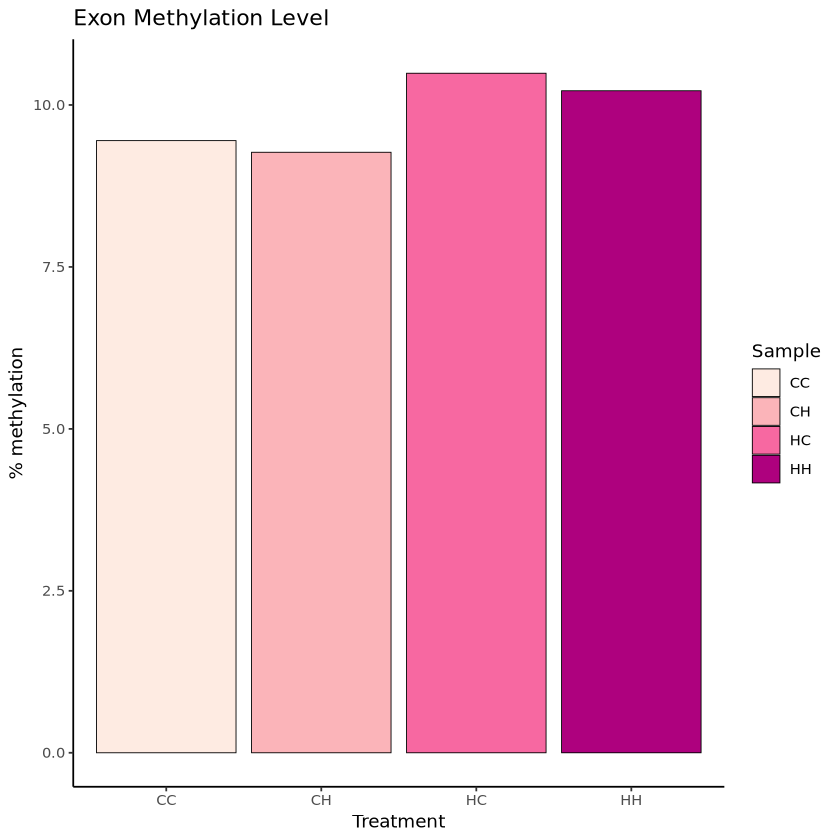

In [12]:
ggplot(exon_df, aes(x = Sample, y = ME_Level, fill = Sample)) +
  geom_bar(stat = "identity") +
scale_fill_brewer(palette = "RdPu",  direction = 1) +
geom_col(color = "black", size = 0.25) +
  labs(title = "Exon Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

In [13]:
p1c <- filter(exon_df, exon_df$Sample %in% c('CC','CH'))

p1h <- filter(exon_df, exon_df$Sample %in% c('HC','HH'))

t.test(p1c$ME_Level, p1h$ME_Level)


	Welch Two Sample t-test

data:  p1c$ME_Level and p1h$ME_Level
t = -6.1325, df = 1.7423, p-value = 0.03523
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.8020356 -0.1879644
sample estimates:
mean of x mean of y 
    9.360    10.355 


so the difference in methylation level of exons is statistically significant between first exposure to control vs. hypoxia

In [52]:
exon_df$phase1 <- ifelse(exon_df$Sample == 'CC', 'control',
                           ifelse(exon_df$Sample == 'CH', 'control', 'hypoxia'))

exon_df$phase2 <- ifelse(exon_df$Sample == 'CC', 'control',
                           ifelse(exon_df$Sample == 'HC', 'control', 'hypoxia'))

In [53]:
exon_df

ME_Level,Sample,phase1,phase2
<dbl>,<chr>,<chr>,<chr>
9.45,CC,control,control
10.49,HC,hypoxia,control
10.22,HH,hypoxia,hypoxia
9.27,CH,control,hypoxia


**overlap of methylated exons with other treatments?**

In [54]:
colnames(CC_filtered) <- c('chr','start', 'stop', '1', '2', '3', '4', '5')

CC_filtered$exon <- paste(CC_filtered$start, CC_filtered$stop, sep='_')

head(CC_filtered)

,chr,start,stop,1,2,3,4,5,exon
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
70,NC_035780.1,258108,259494,78,14,40,20,2,258108_259494
71,NC_035780.1,261478,262168,208,34,144,54,28,261478_262168
72,NC_035780.1,263244,265531,108,24,110,60,22,263244_265531
73,NC_035780.1,263245,265531,108,24,110,60,22,263245_265531
74,NC_035780.1,266196,266755,98,8,66,42,10,266196_266755
75,NC_035780.1,268626,268864,72,38,102,28,20,268626_268864


In [55]:
colnames(CH_filtered) <- c('chr','start', 'stop', '1', '2', '3', '4', '5')

CH_filtered$exon <- paste(CH_filtered$start, CH_filtered$stop, sep='_')

head(CH_filtered)

,chr,start,stop,1,2,3,4,5,exon
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
70,NC_035780.1,258108,259494,72,2,10,24,18,258108_259494
71,NC_035780.1,261478,262168,174,18,46,112,82,261478_262168
72,NC_035780.1,263244,265531,100,0,16,86,78,263244_265531
73,NC_035780.1,263245,265531,100,0,16,86,78,263245_265531
74,NC_035780.1,266196,266755,130,2,32,140,68,266196_266755
75,NC_035780.1,268626,268864,136,2,80,68,66,268626_268864


In [56]:
colnames(HC_filtered) <- c('chr','start', 'stop', '1', '2', '3', '4', '5')

HC_filtered$exon <- paste(HC_filtered$start, HC_filtered$stop, sep='_')

head(HC_filtered)

,chr,start,stop,1,2,3,4,5,exon
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
70,NC_035780.1,258108,259494,54,104,56,68,18,258108_259494
71,NC_035780.1,261478,262168,354,268,386,328,82,261478_262168
72,NC_035780.1,263244,265531,166,110,222,70,26,263244_265531
73,NC_035780.1,263245,265531,166,110,222,70,26,263245_265531
74,NC_035780.1,266196,266755,56,32,56,30,24,266196_266755
75,NC_035780.1,268626,268864,256,210,192,230,24,268626_268864


In [57]:
colnames(HH_filtered) <- c('chr','start', 'stop', '1', '2', '3', '4', '5')

HH_filtered$exon <- paste(HH_filtered$start, HH_filtered$stop, sep='_')

head(HH_filtered)

,chr,start,stop,1,2,3,4,5,exon
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
67,NC_035780.1,247019,247125,0,0,20,24,0,247019_247125
70,NC_035780.1,258108,259494,26,10,30,36,10,258108_259494
71,NC_035780.1,261478,262168,204,118,102,128,84,261478_262168
72,NC_035780.1,263244,265531,108,88,64,108,126,263244_265531
73,NC_035780.1,263245,265531,108,88,64,108,126,263245_265531
74,NC_035780.1,266196,266755,98,36,48,98,102,266196_266755


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


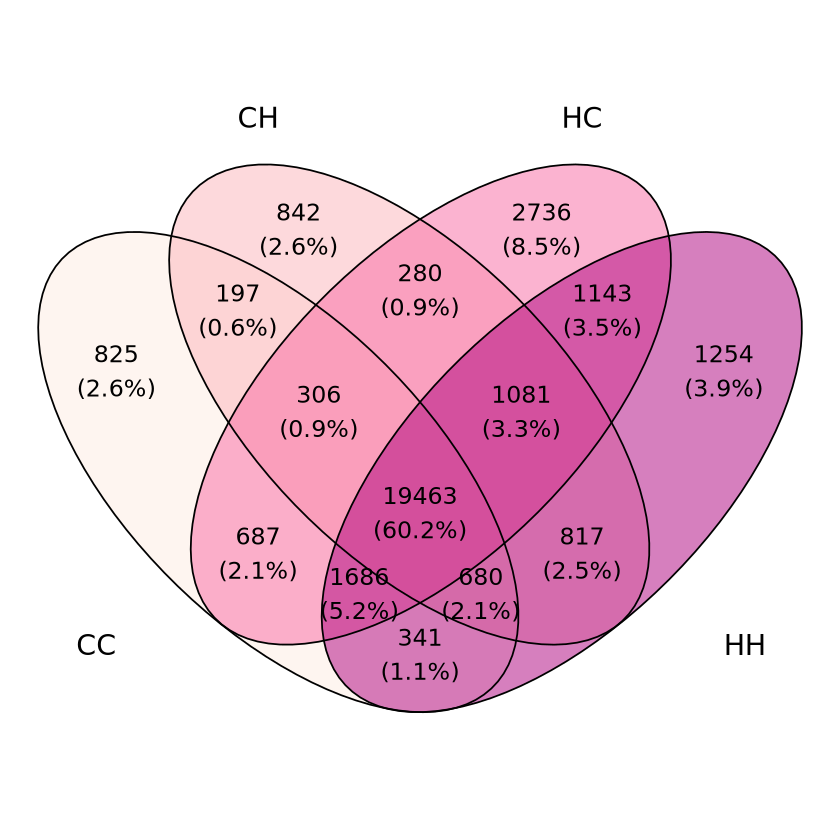

In [58]:
x = list(A = CC_filtered$exon,
         B = CH_filtered$exon, 
         C = HC_filtered$exon,
        D = HH_filtered$exon)

names(x) <- c('CC', 'CH', 'HC', 'HH')

exon_venn <- ggvenn(x,
      set_name_size = 6,
       text_size = 5,
      stroke_size = 0.5, 
       show_percentage = TRUE) + 
scale_fill_brewer(palette = "RdPu",  direction = 1)

exon_venn

In [59]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/exonMe_venn.pdf', exon_venn)

Saving 6.67 x 6.67 in image


#### methylation level of introns
run in command line

In [ ]:
# hypoxic control files
HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

bedtools multicov -bams "${HC_files[@]}" -bed $intron_bed > ${output_dir}HC_multicov_intron.csv

In [ ]:
# control hypoxic files
CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

bedtools multicov -bams "${CH_files[@]}" -bed $intron_bed > ${output_dir}CH_multicov_intron.csv

In [ ]:
# hypoxic hypoxic files
HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

bedtools multicov -bams "${HH_files[@]}" -bed $intron_bed > ${output_dir}HH_multicov_intron.csv

In [ ]:
# control control files
CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam")

bedtools multicov -bams "${CC_files[@]}" -bed $intron_bed > ${output_dir}CC_multicov_intron.csv

#### methylation level of introns

In [7]:
CC_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_multicov_intron.csv", sep='\t')
CH_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_multicov_intron.csv", sep='\t')
HC_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_multicov_intron.csv", sep='\t')
HH_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_multicov_intron.csv", sep='\t')

In [8]:
# CONTROL CONTROL

# Calculate average counts of last 5 columns
CC_intron$avg_counts <- rowMeans(CC_intron[, tail(names(CC_intron), 5)])

# Remove rows with averages below 5
CC_filtered <- CC_intron[CC_intron$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL

CCmethyl_intron <- dim(CC_filtered)[1]
total_intron <- dim(CC_intron)[1]
CC_level_intron <- round((CCmethyl_intron/total_intron)*100, 2)

print(paste(CCmethyl_intron, "methylated introns and", total_intron, "total intons"))
print(paste("intron methylation level of CC:", (CCmethyl_intron)/(total_intron)*100))

[1] "12549 methylated introns and 311167 total intons"
[1] "intron methylation level of CC: 4.03288266429281"


In [9]:
# CONTROL HYPOXIC

# Calculate average counts of last 5 columns
CH_intron$avg_counts <- rowMeans(CH_intron[, tail(names(CH_intron), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_intron[CH_intron$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL

CHmethyl_intron <- dim(CH_filtered)[1]
total_intron <- dim(CH_intron)[1]
CH_level_intron <- round((CHmethyl_intron/total_intron)*100, 2)

print(paste(CHmethyl_intron, "methylated introns and", total_intron, "total introns"))
print(paste("intron methylation level of CH:", (CHmethyl_intron)/(total_intron)*100))

[1] "12560 methylated introns and 311167 total introns"
[1] "intron methylation level of CH: 4.03641774352679"


In [10]:
# HYPOXIC HYPOXIC

# Calculate average counts of last 5 columns
HH_intron$avg_counts <- rowMeans(HH_intron[, tail(names(HH_intron), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_intron[HH_intron$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL

HHmethyl_intron <- dim(HH_filtered)[1]
total_intron <- dim(HH_intron)[1]
HH_level_intron <- round((HHmethyl_intron/total_intron)*100, 2)

print(paste(HHmethyl_intron, "methylated introns and", total_intron, "total introns"))
print(paste("intron methylation level of HH:", (HHmethyl_intron)/(total_intron)*100))

[1] "14738 methylated introns and 311167 total introns"
[1] "intron methylation level of HH: 4.73636343185492"


In [11]:
# HYPOXIC CONTROL

# Calculate average counts of last 5 columns
HC_intron$avg_counts <- rowMeans(HC_intron[, tail(names(HC_intron), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_intron[HC_intron$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL

HCmethyl_intron <- dim(HC_filtered)[1]
total_intron <- dim(HC_intron)[1]
HC_level_intron <- round((HCmethyl_intron/total_intron)*100, 2)

print(paste(HCmethyl_intron, "methylated introns and", total_intron, "total introns"))
print(paste("intron methylation level of HC:", (HCmethyl_intron)/(total_intron)*100))

[1] "15900 methylated introns and 311167 total introns"
[1] "intron methylation level of HC: 5.10979634729904"


In [12]:
intron_me_level <- tibble(CC = CC_level_intron, HC = HC_level_intron, HH = HH_level_intron, CH = CH_level_intron)
intron_me_level

CC,HC,HH,CH
<dbl>,<dbl>,<dbl>,<dbl>
4.03,5.11,4.74,4.04


In [13]:
intron_df <- intron_me_level %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("ME_Level")) %>%  # rename the single column
  mutate(Sample = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

intron_df

ME_Level,Sample
<dbl>,<chr>
4.03,CC
5.11,HC
4.74,HH
4.04,CH


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


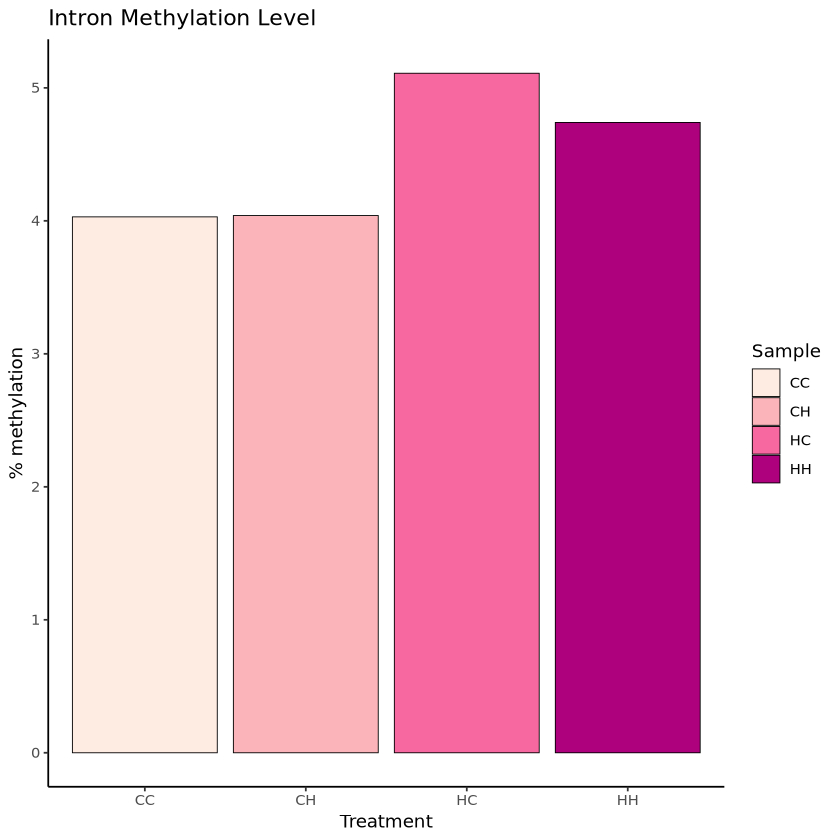

In [15]:
ggplot(intron_df, aes(x = Sample, y = ME_Level, fill = Sample)) +
  geom_bar(stat = "identity") +
geom_col(color = "black", size = 0.25) +
 scale_fill_brewer(palette = "RdPu", direction = 1) +
  labs(title = "Intron Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

# CG motif

In [51]:
CG_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CG_motif_multicov.csv', sep='\t')
dim(CG_multicov)
head(CG_multicov)

[1] 14458702       24

,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4,X0.5,⋯,X0.10,X0.11,X0.12,X0.13,X0.14,X0.15,X0.16,X0.17,X0.18,X0.19
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [110]:
bam_files <- dir(path = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/", pattern = "^.*\\.bam$", full.names = FALSE, ignore.case = TRUE, all.files = TRUE)
bam_files

[1] "2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam"
 [3] "2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam"
 [5] "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam"
 [7] "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam"
 [9] "2018--BBR-BBY-B26-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam"
[11] "2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-BBB-W56-CV_sorted.bam"
[13] "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam"
[15] "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam"
[17] "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam"
[19] "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam"

In [111]:
# clean sample names
bam_files_clean <- gsub("^2018--|-CV_sorted\\.bam$", "", bam_files)
bam_files_clean

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
 [6] "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26" "BBY-WBG-B42"
[11] "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03" "WBO-WBV-W64"
[16] "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65" "WBY-BBY-W30"

In [112]:
colnames(CG_multicov) <- c('chromosome', 'start', 'stop', 'CG_motif', bam_files_clean)
head(CG_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,⋯,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [113]:
# Base columns
base_cols <- CG_multicov[, c("chromosome", "start", "stop", "CG_motif")]

########################################################################
## HYPOXIC CONTROL

# Additional columns matching pattern
HC_cols <- CG_multicov[, grepl("BB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HC_multicov <- cbind(base_cols, HC_cols)

write.csv(HC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv")

########################################################################
## HYPOXIC HYPOXIC

# Additional columns matching pattern
HH_cols <- CG_multicov[, grepl("BB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HH_multicov <- cbind(base_cols, HH_cols)

write.csv(HH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv")

########################################################################
## CONTROL HYPOXIC

# Additional columns matching pattern
CH_cols <- CG_multicov[, grepl("WB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CH_multicov <- cbind(base_cols, CH_cols)

write.csv(CH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv")

########################################################################
# CONTROL CONTROL

# Additional columns matching pattern
CC_cols <- CG_multicov[, grepl("WB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CC_multicov <- cbind(base_cols, CC_cols)

write.csv(CC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv")

########################################################################
head(HC_multicov)
head(HH_multicov)
head(CH_multicov)
head(CC_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


## calculate *overall* methylation level

(number of methylated CG)/(total CG)

methylated CG being those that have an average of 5 sequences over the 5 sample replicates



In [3]:
# read in files so don't have to run code from above
CC_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv')
CH_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv')
HC_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv')
HH_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv')

**CONTROL CONTROL**

In [56]:
head(CC_multicov)

,chromosome,start,stop,CG_motif,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


In [114]:
# Calculate average counts of last 5 columns
CC_multicov$avg_counts <- rowMeans(CC_multicov[,5:9])

# Remove rows with averages below 5
CC_filtered <- CC_multicov[CC_multicov$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL


############## methylation level ##############
CC_CGmethyl <- dim(CC_filtered)[1]
total_CG <- dim(CC_multicov)[1]

CCpercent_me <- round((CC_CGmethyl/total_CG)*100,2)
print(paste(CCpercent_me, "% of CpG dinucleotide is methylated"))


[1] "0.74 % of CpG dinucleotide is methylated"


In [115]:
total_CG

[1] 14458702

**CONTROL HYPOXIC**

In [116]:
# Calculate average counts of last 5 columns
CH_multicov$avg_counts <- rowMeans(CH_multicov[,5:9])

# Remove rows with averages below 5
CH_filtered <- CH_multicov[CH_multicov$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL


############## methylation level ##############
CH_CGmethyl <- dim(CH_filtered)[1]
total_CG <- dim(CH_multicov)[1]

CHpercent_me <- round((CH_CGmethyl/total_CG)*100,2)
print(paste(CHpercent_me, "% of CpG dinucleotide is methylated"))


[1] "0.77 % of CpG dinucleotide is methylated"


**HYPOXIC HYPOXIC**

In [117]:
head(HH_multicov)

,chromosome,start,stop,CG_motif,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


In [118]:
# Calculate average counts of last 5 columns
HH_multicov$avg_counts <- rowMeans(HH_multicov[,5:9])

# Remove rows with averages below 5
HH_filtered <- HH_multicov[HH_multicov$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL


############## methylation level ##############
HH_CGmethyl <- dim(HH_filtered)[1]
total_CG <- dim(HH_multicov)[1]

HHpercent_me <- round((HH_CGmethyl/total_CG)*100,2)
print(paste(HHpercent_me, "% of CpG dinucleotide is methylated"))


[1] "0.9 % of CpG dinucleotide is methylated"


**HYPOXIC CONTROL**

In [119]:
# Calculate average counts of last 5 columns
HC_multicov$avg_counts <- rowMeans(HC_multicov[,5:9])

# Remove rows with averages below 5
HC_filtered <- HC_multicov[HC_multicov$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL


############## methylation level ##############
HC_CGmethyl <- dim(HC_filtered)[1]
total_CG <- dim(HC_multicov)[1]

HCpercent_me <- round((HC_CGmethyl/total_CG)*100,2)
print(paste(HCpercent_me, "% of CpG dinucleotide is methylated"))


[1] "1 % of CpG dinucleotide is methylated"


In [120]:
CpG_methyl <- tibble(
    CH = CHpercent_me,
    HH = HHpercent_me,
    HC = HCpercent_me,
    CC = CCpercent_me)

CpG_methyl <- CpG_methyl %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("percent_me")) %>%  # rename the single column
  mutate(treatment = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

CpG_methyl

percent_me,treatment
<dbl>,<chr>
0.77,CH
0.90,HH
1.00,HC
0.74,CC


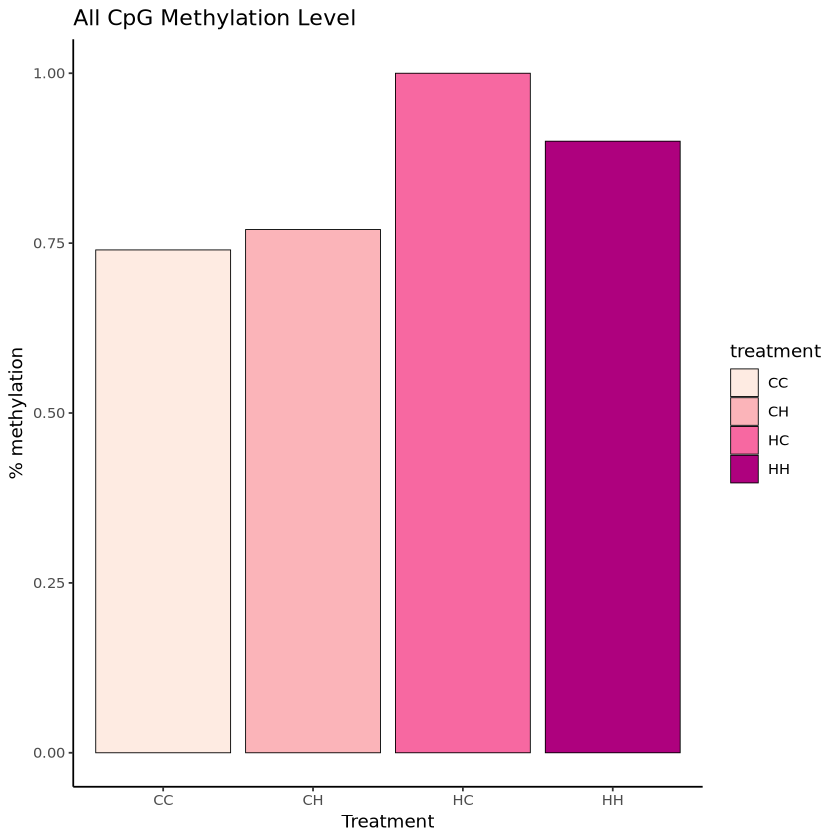

In [121]:
ggplot(CpG_methyl, aes(x = treatment, y = percent_me, fill = treatment)) +
  geom_bar(stat = "identity") +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
geom_col(color = "black", size = 0.25) +
  labs(title = "All CpG Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

**overlap of methylated CpGs between treatments**

To determine what CpGs are methylated in multiple treatments, going to plot a venn diagram. To do this, I am going to create a new column in the original treatment CpG multicov dataframe called 'gene' - this will be a concatenation of the start and stop columns so that I can have names for the exons to identify them in other treatments.

In [122]:
CC_filtered$CpG <- paste(CC_filtered$start, CC_filtered$stop, sep='_')

head(CC_filtered)

,chromosome,start,stop,CG_motif,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12,CpG
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
432,NC_035780.1,20157,20159,CG_motif,20,2,6,8,0,20157_20159
433,NC_035780.1,20170,20172,CG_motif,20,2,6,8,0,20170_20172
522,NC_035780.1,23615,23617,CG_motif,14,6,12,4,2,23615_23617
523,NC_035780.1,23620,23622,CG_motif,14,6,12,4,2,23620_23622
524,NC_035780.1,23624,23626,CG_motif,14,6,12,4,2,23624_23626
525,NC_035780.1,23631,23633,CG_motif,14,6,12,4,2,23631_23633


In [123]:
CH_filtered$CpG <- paste(CH_filtered$start, CH_filtered$stop, sep='_')

head(CH_filtered)

,chromosome,start,stop,CG_motif,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30,CpG
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
522,NC_035780.1,23615,23617,CG_motif,10,0,2,13,8,23615_23617
523,NC_035780.1,23620,23622,CG_motif,10,0,2,13,8,23620_23622
524,NC_035780.1,23624,23626,CG_motif,10,0,2,13,8,23624_23626
525,NC_035780.1,23631,23633,CG_motif,10,0,2,13,8,23631_23633
526,NC_035780.1,23638,23640,CG_motif,10,0,2,13,6,23638_23640
4684,NC_035780.1,198167,198169,CG_motif,32,0,6,16,30,198167_198169


In [124]:
HH_filtered$CpG <- paste(HH_filtered$start, HH_filtered$stop, sep='_')

head(HH_filtered)

,chromosome,start,stop,CG_motif,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,CpG
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
375,NC_035780.1,17176,17178,CG_motif,4,4,6,14,2,17176_17178
430,NC_035780.1,20142,20144,CG_motif,4,12,4,2,6,20142_20144
431,NC_035780.1,20149,20151,CG_motif,4,12,4,2,6,20149_20151
432,NC_035780.1,20157,20159,CG_motif,8,12,6,4,10,20157_20159
433,NC_035780.1,20170,20172,CG_motif,8,12,6,4,10,20170_20172
518,NC_035780.1,23584,23586,CG_motif,10,10,2,6,12,23584_23586


In [125]:
HC_filtered$CpG <- paste(HC_filtered$start, HC_filtered$stop, sep='_')

head(HC_filtered)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42,CpG
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
375,NC_035780.1,17176,17178,CG_motif,8,2,7,11,0,17176_17178
430,NC_035780.1,20142,20144,CG_motif,0,4,18,4,6,20142_20144
431,NC_035780.1,20149,20151,CG_motif,0,4,17,4,6,20149_20151
432,NC_035780.1,20157,20159,CG_motif,2,8,25,6,6,20157_20159
433,NC_035780.1,20170,20172,CG_motif,2,8,25,6,6,20170_20172
522,NC_035780.1,23615,23617,CG_motif,16,2,16,4,2,23615_23617


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


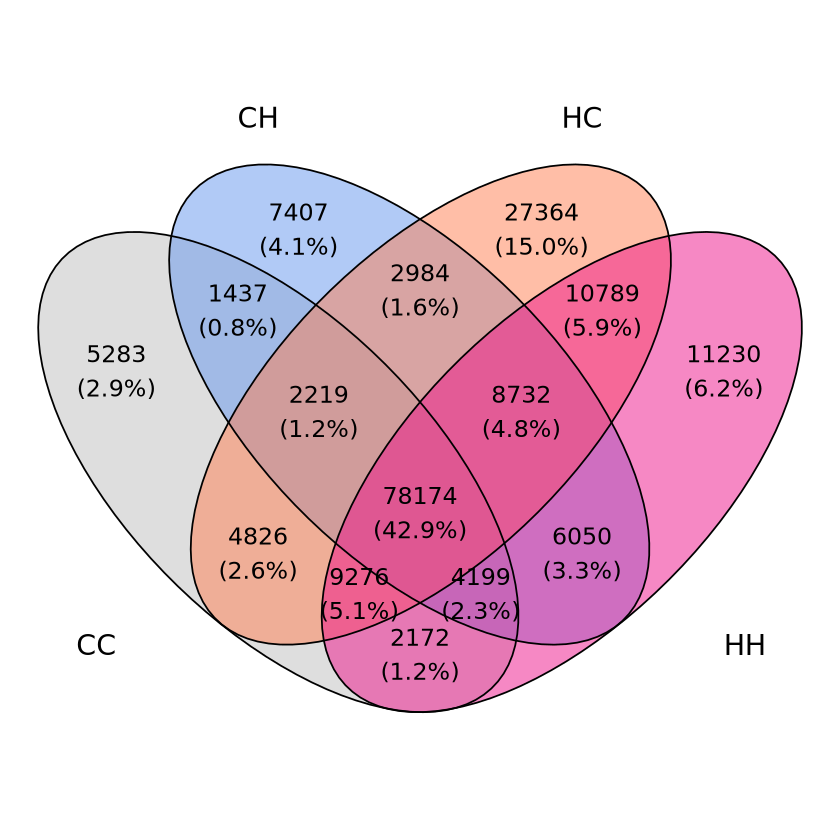

In [126]:
x = list(A = CC_filtered$CpG,
         B = CH_filtered$CpG, 
         C = HC_filtered$CpG,
        D = HH_filtered$CpG)

names(x) <- c('CC', 'CH', 'HC', 'HH')

cpg_venn <- ggvenn(x,
      set_name_size = 6,
       text_size = 5,
      stroke_size = 0.5, 
       show_percentage = TRUE) + 
scale_fill_manual(values=c('gray', 'cornflowerblue', 'coral','deeppink2'))

cpg_venn

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


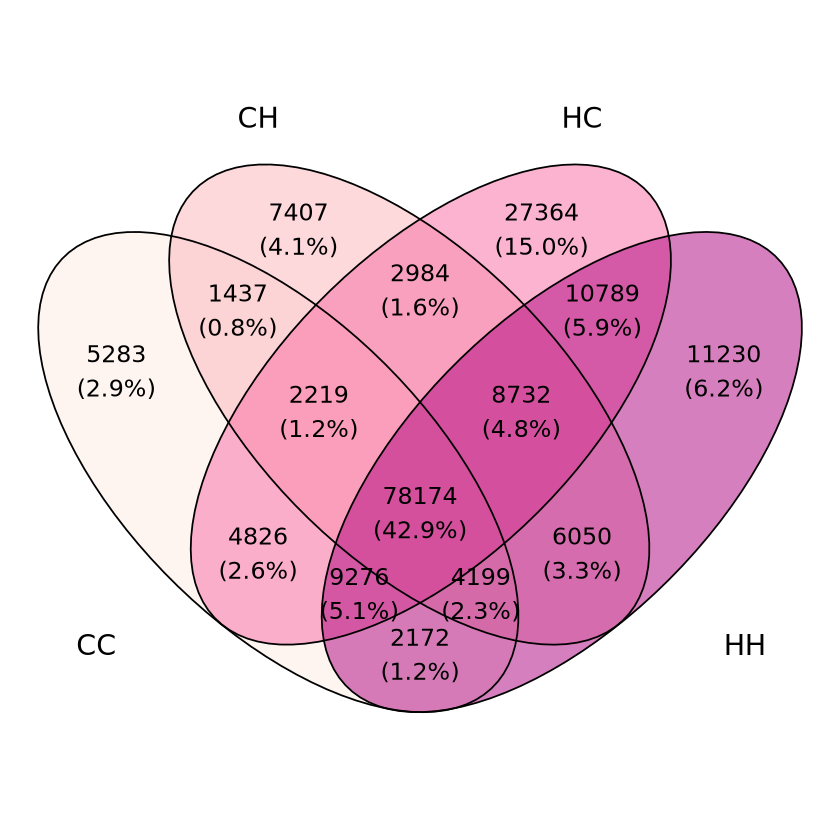

In [18]:
x = list(A = CC_filtered$CpG,
         B = CH_filtered$CpG, 
         C = HC_filtered$CpG,
        D = HH_filtered$CpG)

names(x) <- c('CC', 'CH', 'HC', 'HH')

cpg_venn <- ggvenn(x,
      set_name_size = 6,
       text_size = 5,
      stroke_size = 0.5, 
       show_percentage = TRUE) + 
scale_fill_brewer(palette = "RdPu",  direction = 1) 

cpg_venn

In [19]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/cpgMe_venn.pdf', cpg_venn)

Saving 6.67 x 6.67 in image


## Methylation level by sample

The above code calculated methylation level by averaging across the 5 replicates per treatment *before* the analysis/bar plots - going to instead calculate methylation level for each replicate, then group into treatment so we can get more statistics (error bars etc.)

starting with:

### ind. methylation level of EXONS

General pipeline:
1. Grab the 5 columns for each replicate in the 'big' data frame
2. Only keep the exons that have at least 5 sequences for that replicate (choosing 5 based on 5x coverage used in Ventakamaran et al 2022) - calculate how many rows are kept 
3. Calculate methylation level based on this calculation: (methylated exons/total exons)x100


IF ALREADY RAN CODE ONCE, skip to bottom and load CSV

**control control**

In [4]:
# Assuming your dataframe is named 'df'
sample_columns <- CC_exon[, 4:ncol(CC_exon)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_cc <- colSums(sample_columns >= 5)

# Print the result
ML_cc

X0  X0.1  X0.2  X0.3  X0.4 
78514 42458 78979 55428 28635

In [5]:
total_exon <- dim(CC_exon)[1]
total_exon

[1] 731278

In [6]:
# create dataframe 
CCml_exon <- as.data.frame(ML_cc)

CCml_exon <- as.data.frame(CCml_exon[1:5,])

# assign replicate #'s
CCml_exon$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CCml_exon) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CCml_exon) <- NULL

# add treatment
CCml_exon$treatment <- 'CC'

CCml_exon

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
78514,1,CC
42458,2,CC
78979,3,CC
55428,4,CC
28635,5,CC


In [7]:
# calculate methylation level
CCml_exon$methyl_level <- round(((CCml_exon$methyl_count/total_exon)*100),2)

# reorder columns to make sense
CCml_exon <- select(CCml_exon, treatment, replicate, methyl_count, methyl_level)

CCml_exon

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
CC,1,78514,10.74
CC,2,42458,5.81
CC,3,78979,10.80
CC,4,55428,7.58
CC,5,28635,3.92


**control hypoxic**

In [8]:
# Assuming your dataframe is named 'df'
sample_columns <- CH_exon[, 4:ncol(CH_exon)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_ch <- colSums(sample_columns >= 5)

# Print the result
ML_ch

X0  X0.1  X0.2  X0.3  X0.4 
74413 20653 48196 75422 61892

In [9]:
# create dataframe 
CHml_exon <- as.data.frame(ML_ch)
CHml_exon <- as.data.frame(CHml_exon[1:5,])

# assign replicate #'s
CHml_exon$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CHml_exon) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CHml_exon) <- NULL

# add treatment
CHml_exon$treatment <- 'CH'

CHml_exon

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
74413,1,CH
20653,2,CH
48196,3,CH
75422,4,CH
61892,5,CH


In [10]:
# calculate methylation level
CHml_exon$methyl_level <- round(((CHml_exon$methyl_count/total_exon)*100),2)

# reorder columns to make sense
CHml_exon <- select(CHml_exon, treatment, replicate, methyl_count, methyl_level)

CHml_exon

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
CH,1,74413,10.18
CH,2,20653,2.82
CH,3,48196,6.59
CH,4,75422,10.31
CH,5,61892,8.46


**hypoxic hypoxic**

In [11]:
# Assuming your dataframe is named 'df'
sample_columns <- HH_exon[, 4:ncol(HH_exon)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hh <- colSums(sample_columns >= 5)

# Print the result
ML_hh

X0  X0.1  X0.2  X0.3    X2 
73003 61895 66738 72082 71438

In [12]:
# create dataframe 
HHml_exon <- as.data.frame(ML_hh)
HHml_exon <- as.data.frame(HHml_exon[1:5,])

# assign replicate #'s
HHml_exon$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HHml_exon) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HHml_exon) <- NULL

# add treatment
HHml_exon$treatment <- 'HH'

HHml_exon

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
73003,1,HH
61895,2,HH
66738,3,HH
72082,4,HH
71438,5,HH


In [13]:
# calculate methylation level
HHml_exon$methyl_level <- round(((HHml_exon$methyl_count/total_exon)*100),2)

# reorder columns to make sense
HHml_exon <- select(HHml_exon, treatment, replicate, methyl_count, methyl_level)

HHml_exon

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
HH,1,73003,9.98
HH,2,61895,8.46
HH,3,66738,9.13
HH,4,72082,9.86
HH,5,71438,9.77


**hypoxic control**

In [14]:
# Assuming your dataframe is named 'df'
sample_columns <- HC_exon[, 4:ncol(HC_exon)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hc <- colSums(sample_columns >= 5)

# Print the result
ML_hc

X0  X0.1  X0.2  X0.3  X0.4 
72299 71125 75499 71055 48816

In [15]:
# create dataframe 
HCml_exon <- as.data.frame(ML_hc)
HCml_exon <- as.data.frame(HCml_exon[1:5,])

# assign replicate #'s
HCml_exon$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HCml_exon) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HCml_exon) <- NULL

# add treatment
HCml_exon$treatment <- 'HC'

HCml_exon

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
72299,1,HC
71125,2,HC
75499,3,HC
71055,4,HC
48816,5,HC


In [16]:
# calculate methylation level
HCml_exon$methyl_level <- round(((HCml_exon$methyl_count/total_exon)*100),2)

# reorder columns to make sense
HCml_exon <- select(HCml_exon, treatment, replicate, methyl_count, methyl_level)

HCml_exon

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
HC,1,72299,9.89
HC,2,71125,9.73
HC,3,75499,10.32
HC,4,71055,9.72
HC,5,48816,6.68


In [17]:
exon_meLevel <- rbind(CCml_exon, CHml_exon, HCml_exon, HHml_exon)
exon_meLevel

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
CC,1,78514,10.74
CC,2,42458,5.81
CC,3,78979,10.80
CC,4,55428,7.58
CC,5,28635,3.92
CH,1,74413,10.18
CH,2,20653,2.82
CH,3,48196,6.59
CH,4,75422,10.31


In [18]:
# create csv file so can skip the long code running above
write.csv(exon_meLevel, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/exon_meLevel.csv')

In [6]:
exon_meLevel <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/exon_meLevel.csv')

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


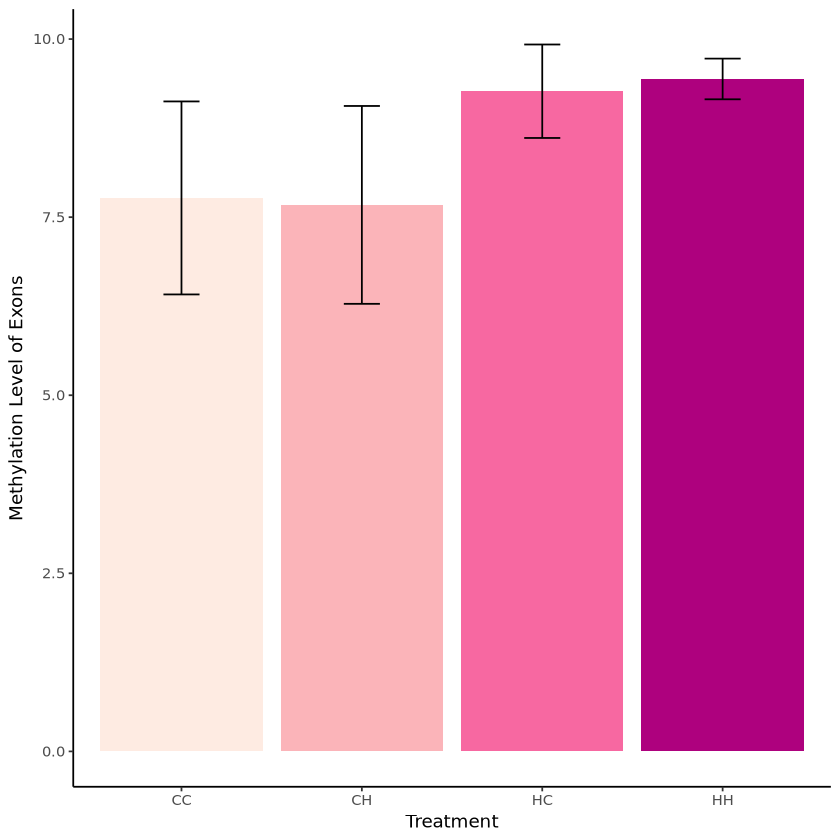

In [7]:
df_summary <- exon_meLevel %>%
  group_by(treatment) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  )

# Create a bar plot with error bars
exonMe_barplot <- ggplot(df_summary, aes(x = treatment, y = mean_methyl_level, fill = treatment)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
#geom_col(color = "black", size = 0.25) +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
guides(fill = FALSE) +
  labs(x = "Treatment", y = "Methylation Level of Exons") +
  theme_classic()

exonMe_barplot

In [51]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/exonMe_barplot.pdf', exonMe_barplot)

Saving 6.67 x 6.67 in image


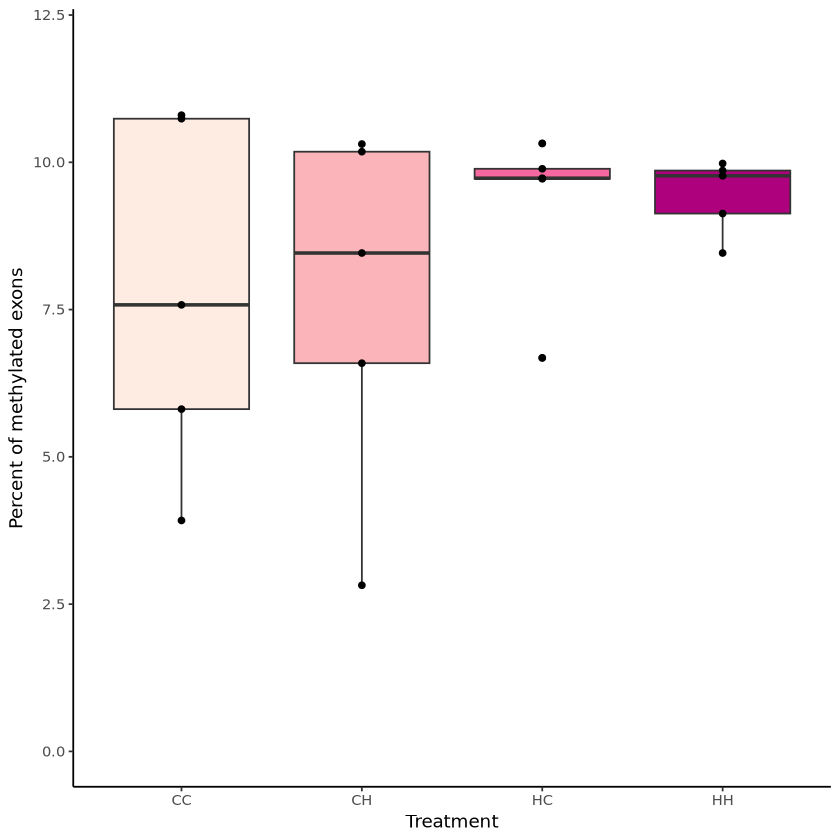

In [9]:
exonMe_boxplot <- ggplot(exon_meLevel, aes(x = treatment, y = methyl_level, fill = treatment)) +
  geom_boxplot() +
geom_point() +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
ylim(0,12) +
guides(fill='none') +
  labs(x = "Treatment", y = "Percent of methylated exons") +
  theme_classic()

exonMe_boxplot

In [10]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/exonMe_boxplot.pdf', exonMe_boxplot)

Saving 6.67 x 6.67 in image


### ANOVA of exon methylation
want to know if the differences in exon methylation between treatments is statistically significant

following pipeline [here](https://www.sthda.com/english/wiki/one-way-anova-test-in-r)

In [55]:
# make copy of df
exons <- exon_meLevel

# set levels
exons$treatment <- ordered(exons$treatment,
                           levels = c('CC', 'CH', 'HC', 'HH'))

levels(exons$treatment)

[1] "CC" "CH" "HC" "HH"

In [57]:
# summary statistics
group_by(exons, treatment) %>%
summarise(count = n(),
          mean = mean(methyl_level, na.rm=TRUE),
          sd = sd(methyl_level, na.rm=TRUE)
          )

treatment,count,mean,sd
<ord>,<int>,<dbl>,<dbl>
CC,5,7.770,3.0291088
CH,5,7.672,3.1057479
HC,5,9.268,1.4670617
HH,5,9.440,0.6390227


In [62]:
res.aov <- aov(methyl_level ~ treatment, data = exons)
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
treatment    3  13.43   4.477   0.838  0.493
Residuals   16  85.53   5.345               

In [63]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ treatment, data = exons)

$treatment
        diff      lwr     upr     p adj
CH-CC -0.098 -4.28153 4.08553 0.9998871
HC-CC  1.498 -2.68553 5.68153 0.7379103
HH-CC  1.670 -2.51353 5.85353 0.6699304
HC-CH  1.596 -2.58753 5.77953 0.6995594
HH-CH  1.768 -2.41553 5.95153 0.6301686
HH-HC  0.172 -4.01153 4.35553 0.9993923


In [64]:
pairwise.t.test(exons$methyl_level, exons$treatment, p.adjust.method = 'BH')


	Pairwise comparisons using t tests with pooled SD 

data:  exons$methyl_level and exons$treatment 

   CC   CH   HC  
CH 0.95 -    -   
HC 0.48 0.48 -   
HH 0.48 0.48 0.95

P value adjustment method: BH 

**check the homogeneity of variance assumption**

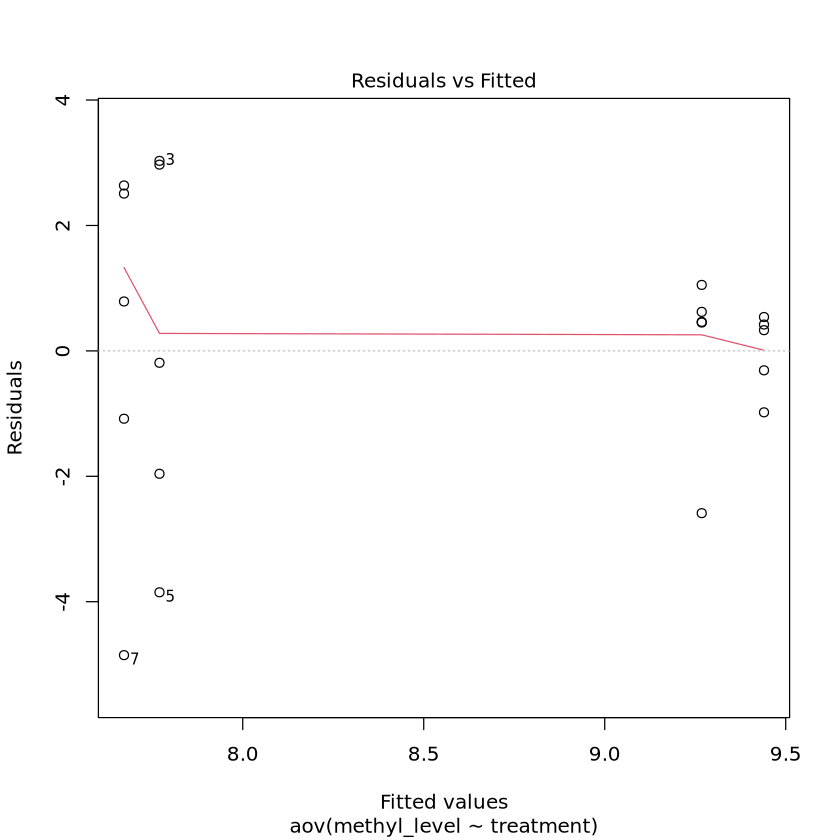

In [65]:
plot(res.aov,1)

In [67]:
library(car)

In [68]:
leveneTest(methyl_level ~ treatment, data = exons)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,2.264106,0.1202529
,16,NA,NA


from [source](https://www.sthda.com/english/wiki/one-way-anova-test-in-r): "...the p-value is not less than the significance level of 0.05. This means that there is no evidence to suggest that the variance across groups is statistically significantly different. Therefore, we can assume the homogeneity of variances in the different treatment groups."

**check the normality assumption**


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.93466, p-value = 0.1897


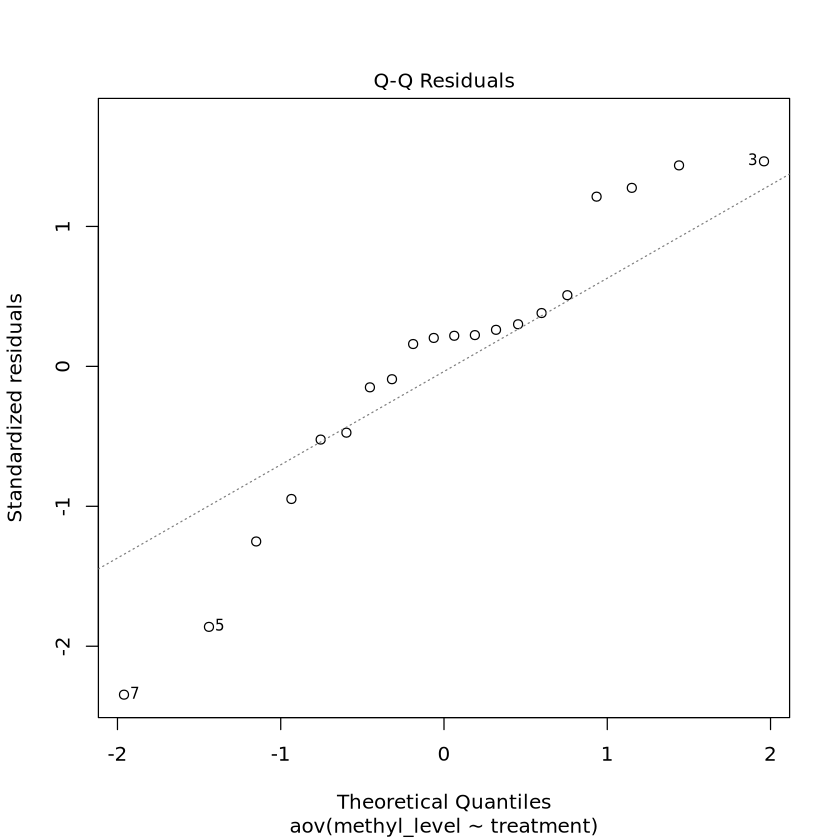

In [70]:
plot(res.aov, 2)

# Extract the residuals
aov_residuals <- residuals(object = res.aov )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

so doesn't appear to be any statistically significant differences between methylation level for exons for the diff. treatments - I wonder if I collapse the data into two groups (first exposure to control and first exposure to hypoxia) if that changes anything?

In [85]:
# first 10 rows have a first exposure to control
exons[1:10,]$first_exp <- 'control'

# last 10 rows have a first exposure to hypoxia
exons[11:20,]$first_exp <- 'hypoxia'

exons

treatment,replicate,methyl_count,methyl_level,first_exp
<ord>,<dbl>,<dbl>,<dbl>,<chr>
CC,1,78514,10.74,control
CC,2,42458,5.81,control
CC,3,78979,10.80,control
CC,4,55428,7.58,control
CC,5,28635,3.92,control
CH,1,74413,10.18,control
CH,2,20653,2.82,control
CH,3,48196,6.59,control
CH,4,75422,10.31,control


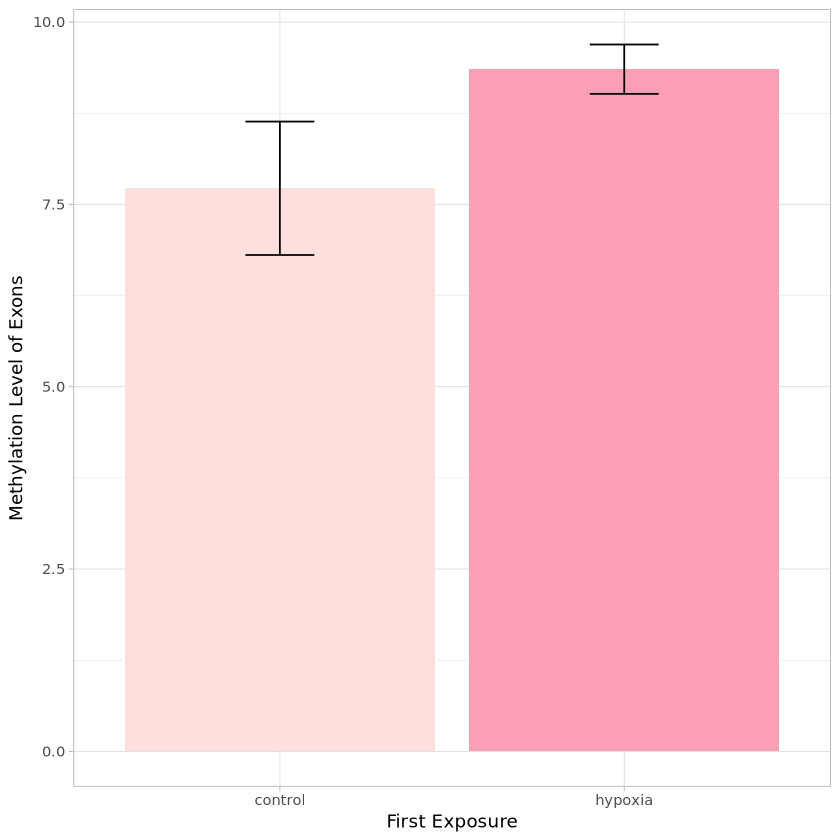

In [86]:
df_summary <- exons %>%
  group_by(first_exp) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  )

# Create a bar plot with error bars
ggplot(df_summary, aes(x = first_exp, y = mean_methyl_level, fill = first_exp)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
#geom_col(color = "black", size = 0.25) +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
guides(fill = FALSE) +
  labs(x = "First Exposure", y = "Methylation Level of Exons") +
  theme_light()

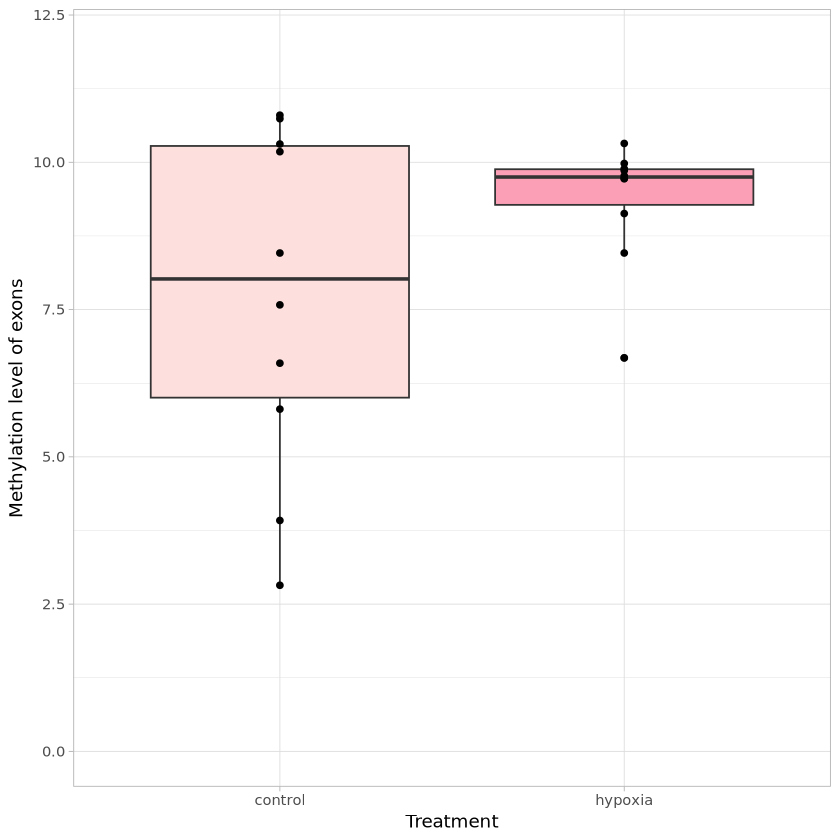

In [91]:
ggplot(exons, aes(x = first_exp, y = methyl_level, fill = first_exp)) +
  geom_boxplot() +
geom_point() +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
ylim(0,12) +
guides(fill='none') +
  labs(x = "Treatment", y = "Methylation level of exons") +
  theme_light()


so the two groups have overlap, but first exposure to hypoxia is a lot tigheter, less variation in the methylation level of exons

In [87]:
# set levels
exons$first_exp <- ordered(exons$first_exp,
                           levels = c('control', 'hypoxia'))

levels(exons$first_exp)

[1] "control" "hypoxia"

In [88]:
# summary statistics
group_by(exons, first_exp) %>%
summarise(count = n(),
          mean = mean(methyl_level, na.rm=TRUE),
          sd = sd(methyl_level, na.rm=TRUE)
          )

first_exp,count,mean,sd
<ord>,<int>,<dbl>,<dbl>
control,10,7.721,2.892686
hypoxia,10,9.354,1.070641


In [89]:
res.aov <- aov(methyl_level ~ first_exp, data = exons)
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
first_exp    1  13.33  13.333   2.803  0.111
Residuals   18  85.63   4.757               

In [90]:
pairwise.t.test(exons$methyl_level, exons$first_exp, p.adjust.method = 'BH')


	Pairwise comparisons using t tests with pooled SD 

data:  exons$methyl_level and exons$first_exp 

        control
hypoxia 0.11   

P value adjustment method: BH 

per recommendation of SGW 12/5, doing two-way ANOVA to look at interaction of phase 1 and phase 2

#### two-way ANOVA of exon methylation

In [56]:
# for loop to assign phase 1 and phase 2 treatments based on the treatment column
exon_meLevel <- exon_meLevel %>%
  mutate(phase1 = ifelse(str_sub(treatment, 1, 1) == "C", "control", "hypoxia"),
         phase2 = ifelse(str_sub(treatment, 2, 2) == "H", "hypoxia", "control"))

exon_meLevel

X,treatment,replicate,methyl_count,methyl_level,phase1,phase2
<int>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
1,CC,1,78514,10.74,control,control
2,CC,2,42458,5.81,control,control
3,CC,3,78979,10.80,control,control
4,CC,4,55428,7.58,control,control
5,CC,5,28635,3.92,control,control
6,CH,1,74413,10.18,control,hypoxia
7,CH,2,20653,2.82,control,hypoxia
8,CH,3,48196,6.59,control,hypoxia
9,CH,4,75422,10.31,control,hypoxia


In [57]:
# running a two-way ANOVA
model <- aov(methyl_level ~ phase1 * phase2, data = exon_meLevel)
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)
phase1         1  13.33  13.333   2.494  0.134
phase2         1   0.01   0.007   0.001  0.972
phase1:phase2  1   0.09   0.091   0.017  0.898
Residuals     16  85.53   5.345               

There doesn't seem to be an effect of phase 1 or 2 on the methylation level of exons - which is interesting bc we see a strong effect on CpG methylation

#### **Tukey Honestly Significant Difference (HSD)** post hoc test 
compares the means of multiple groups

In [58]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ phase1 * phase2, data = exon_meLevel)

$phase1
                 diff        lwr      upr     p adj
hypoxia-control 1.633 -0.5589139 3.824914 0.1338193

$phase2
                 diff       lwr      upr     p adj
hypoxia-control 0.037 -2.154914 2.228914 0.9718969

$`phase1:phase2`
                                  diff      lwr     upr     p adj
hypoxia:control-control:control  1.498 -2.68553 5.68153 0.7379103
control:hypoxia-control:control -0.098 -4.28153 4.08553 0.9998871
hypoxia:hypoxia-control:control  1.670 -2.51353 5.85353 0.6699304
control:hypoxia-hypoxia:control -1.596 -5.77953 2.58753 0.6995594
hypoxia:hypoxia-hypoxia:control  0.172 -4.01153 4.35553 0.9993923
hypoxia:hypoxia-control:hypoxia  1.768 -2.41553 5.95153 0.6301686


# ind. methylation level of CpGs
(if already ran code once, skip to bottom and load CSV)

**control control**

In [129]:
head(CC_multicov)

,chromosome,start,stop,CG_motif,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12,avg_counts
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0


In [130]:
CCsample_columns <- CC_multicov[, 5:9] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_cc <- colSums(CCsample_columns >= 5)

# Print the result
ML_cc

WBB-WBV-W69 WBG-WBG-W44 WBO-WBV-W64 WBV-WBO-W23 WBV-WBR-W12 
     147798       59287      137931       81789       33975

In [133]:
total_cg <- dim(CC_multicov)[1]
total_cg

[1] 14458702

In [135]:
# create dataframe 
CCml_cpg <- as.data.frame(ML_cc)


# assign replicate #'s
CCml_cpg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CCml_cpg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CCml_cpg) <- NULL

# add treatment
CCml_cpg$treatment <- 'CC'

CCml_cpg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
147798,1,CC
59287,2,CC
137931,3,CC
81789,4,CC
33975,5,CC


In [143]:
# calculate methylation level
CCml_cpg$methyl_level <- round(((CCml_cpg$methyl_count/total_cg)*100),3)

# reorder columns to make sense
#CCml_cpg <- select(CCml_cpg, treatment, replicate, methyl_count, methyl_level)

CCml_cpg

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
147798,1,CC,1.022
59287,2,CC,0.410
137931,3,CC,0.954
81789,4,CC,0.566
33975,5,CC,0.235


**control hypoxic**

In [137]:
head(CH_multicov)

,chromosome,start,stop,CG_motif,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30,avg_counts
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0


In [139]:
CHsample_columns <- CH_multicov[,5:9] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_ch <- colSums(CHsample_columns >= 5)

# Print the result
ML_ch

WBG-BBB-W56 WBO-BBR-W03 WBR-BBY-W25 WBY-BBV-W65 WBY-BBY-W30 
     140077       24101       73538      136233      104170

In [140]:
# create dataframe 
CHml_cg <- as.data.frame(ML_ch)

# assign replicate #'s
CHml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CHml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CHml_cg) <- NULL

# add treatment
CHml_cg$treatment <- 'CH'

CHml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
140077,1,CH
24101,2,CH
73538,3,CH
136233,4,CH
104170,5,CH


In [142]:
# calculate methylation level
CHml_cg$methyl_level <- round(((CHml_cg$methyl_count/total_cg)*100),3)

# reorder columns to make sense
#CHml_cg <- select(CHml_cg, treatment, replicate, methyl_count, methyl_level)

CHml_cg

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
140077,1,CH,0.969
24101,2,CH,0.167
73538,3,CH,0.509
136233,4,CH,0.942
104170,5,CH,0.720


**hypoxic hypoxic**

In [144]:
HHsample_columns <- HH_multicov[,5:9] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hh <- colSums(HHsample_columns >= 5)

# Print the result
ML_hh

BBO-BBO-B16 BBO-BBY-B27 BBR-BBB-B50 BBR-BBG-B38 BBR-BBY-B26 
     132674      105032      104681      134384      129732

In [145]:
# create dataframe 
HHml_cg <- as.data.frame(ML_hh)

# assign replicate #'s
HHml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HHml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HHml_cg) <- NULL

# add treatment
HHml_cg$treatment <- 'HH'

HHml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
132674,1,HH
105032,2,HH
104681,3,HH
134384,4,HH
129732,5,HH


In [146]:
# calculate methylation level
HHml_cg$methyl_level <- round(((HHml_cg$methyl_count/total_cg)*100),3)

# reorder columns to make sense
HHml_cg <- select(HHml_cg, treatment, replicate, methyl_count, methyl_level)

HHml_cg

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
HH,1,132674,0.918
HH,2,105032,0.726
HH,3,104681,0.724
HH,4,134384,0.929
HH,5,129732,0.897


**hypoxic control**

In [153]:
HCsample_columns <- HC_multicov[, 5:9] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hc <- colSums(HCsample_columns >= 5)

# Print the result
ML_hc

BBB-WBO-B21 BBB-WBV-B70 BBO-WBO-B16 BBO-WBV-B64 BBY-WBG-B42 
     138394      136261      149013      136293       67842

In [154]:
# create dataframe 
HCml_cg <- as.data.frame(ML_hc)

# assign replicate #'s
HCml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HCml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HCml_cg) <- NULL

# add treatment
HCml_cg$treatment <- 'HC'

HCml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
138394,1,HC
136261,2,HC
149013,3,HC
136293,4,HC
67842,5,HC


In [155]:
# calculate methylation level
HCml_cg$methyl_level <- round(((HCml_cg$methyl_count/total_cg)*100),2)

# reorder columns to make sense
#HCml_cg <- select(HCml_cg, treatment, replicate, methyl_count, methyl_level)

HCml_cg

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
138394,1,HC,0.96
136261,2,HC,0.94
149013,3,HC,1.03
136293,4,HC,0.94
67842,5,HC,0.47


In [156]:
cg_meLevel <- rbind(CCml_cpg, CHml_cg, HCml_cg, HHml_cg)
cg_meLevel

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
147798,1,CC,1.022
59287,2,CC,0.410
137931,3,CC,0.954
81789,4,CC,0.566
33975,5,CC,0.235
140077,1,CH,0.969
24101,2,CH,0.167
73538,3,CH,0.509
136233,4,CH,0.942


In [125]:
# create csv to avoid running long code above
write.csv(cg_meLevel, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')

IF ALREADY RAN ABOVE CODE just load in csv:

In [20]:
cg_meLevel <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')

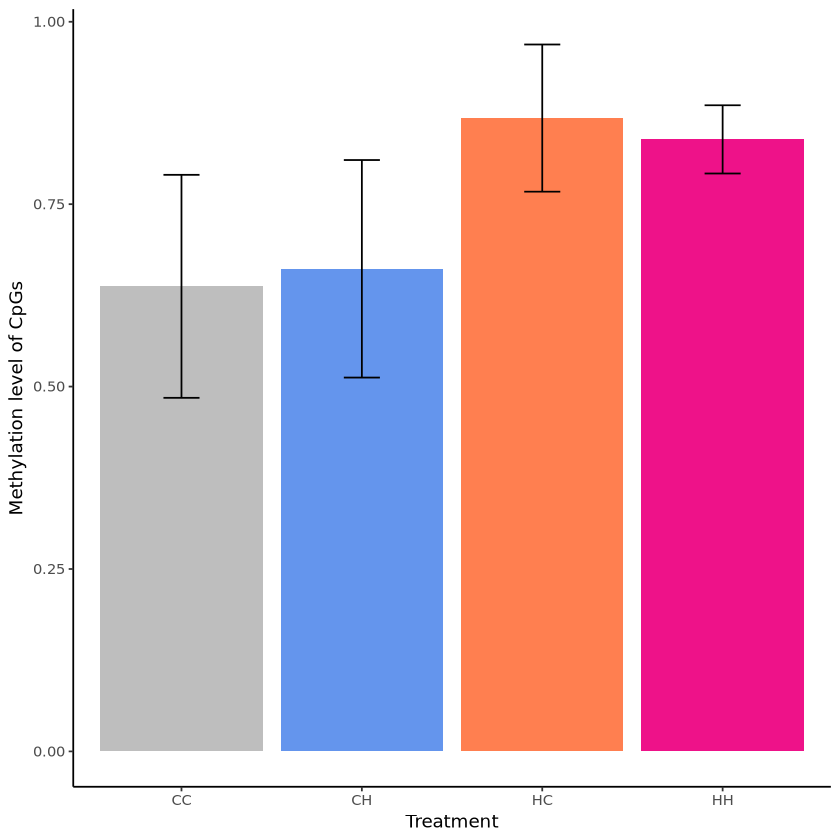

In [157]:
df_summary <- cg_meLevel %>%
  group_by(treatment) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  )

# Create a bar plot with error bars
cpgMe_barplot <- ggplot(df_summary, aes(x = treatment, y = mean_methyl_level, fill = treatment)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
#scale_fill_brewer(palette = "RdPu", direction = 1) +
scale_fill_manual(values=c('gray', 'cornflowerblue', 'coral','deeppink2')) +
guides(fill = FALSE) +
  labs(x = "Treatment", y = "Methylation level of CpGs") +
  theme_classic()

cpgMe_barplot

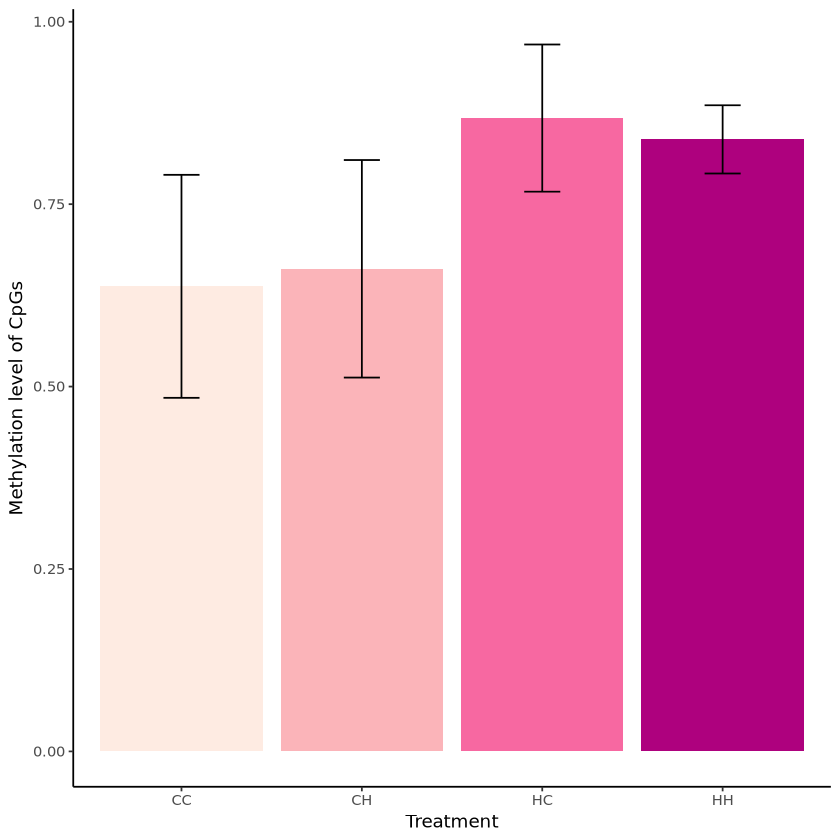

In [158]:
df_summary <- cg_meLevel %>%
  group_by(treatment) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  )

# Create a bar plot with error bars
cpgMe_barplot <- ggplot(df_summary, aes(x = treatment, y = mean_methyl_level, fill = treatment)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
guides(fill = FALSE) +
  labs(x = "Treatment", y = "Methylation level of CpGs") +
  theme_classic()

cpgMe_barplot

In [128]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/cpgMe_barplot.pdf', cpgMe_barplot)

Saving 6.67 x 6.67 in image


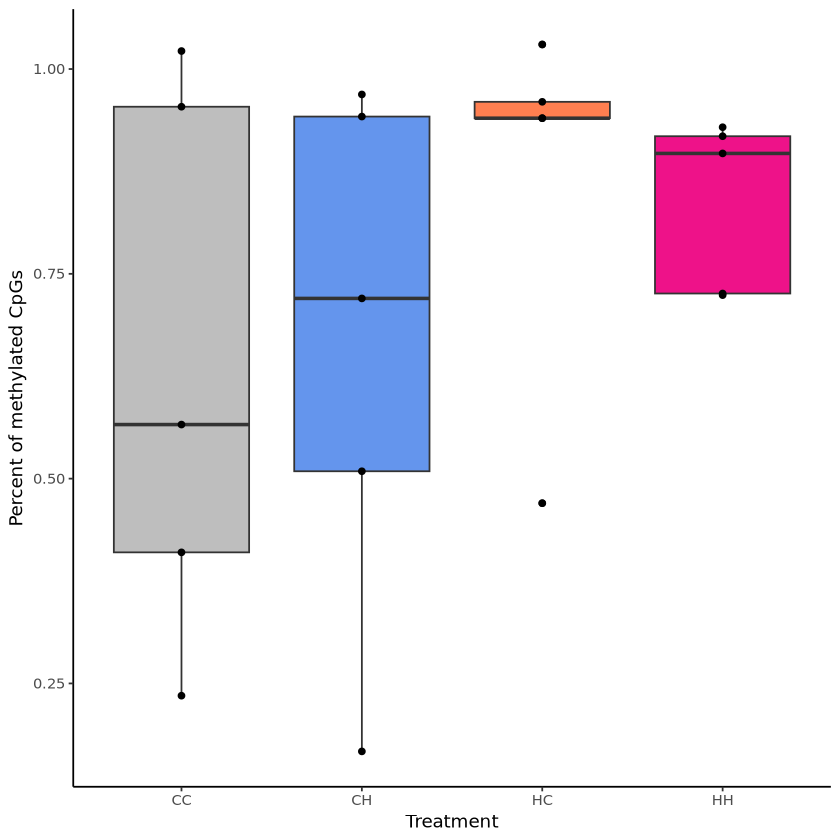

In [159]:
cpgMe_boxplot <- ggplot(cg_meLevel, aes(x = treatment, y = methyl_level, fill = treatment)) +
  geom_boxplot() +
geom_point() +
#scale_fill_brewer(palette = "RdPu", direction = 1) +
scale_fill_manual(values=c('gray', 'cornflowerblue', 'coral','deeppink2')) +
guides(fill=FALSE) +
  labs(x = "Treatment", y = "Percent of methylated CpGs") +
  theme_classic()

cpgMe_boxplot

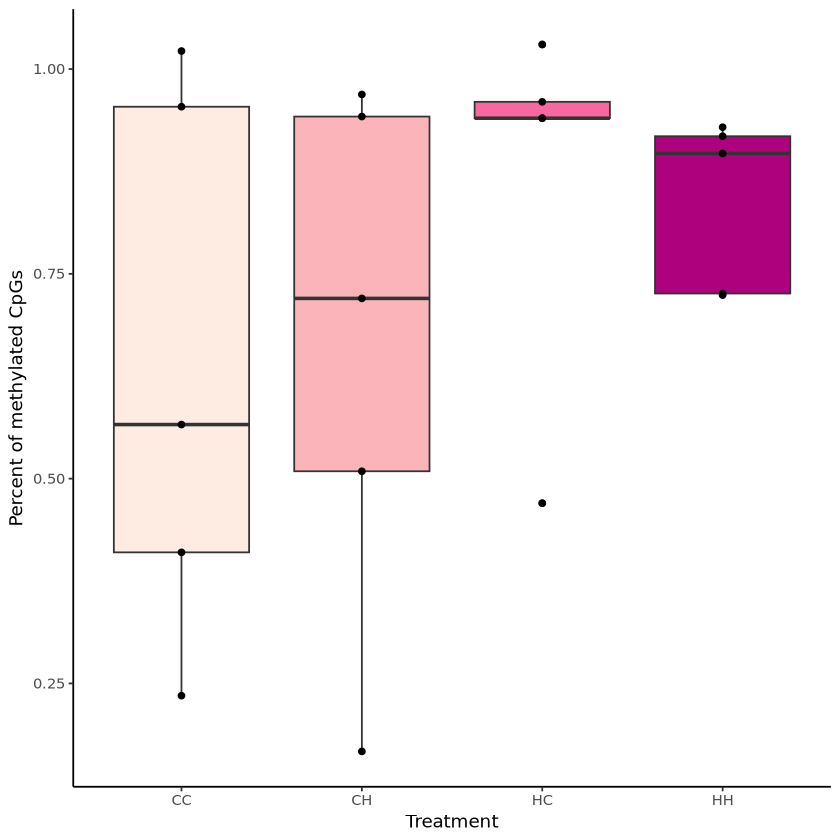

In [160]:
cpgMe_boxplot <- ggplot(cg_meLevel, aes(x = treatment, y = methyl_level, fill = treatment)) +
  geom_boxplot() +
geom_point() +
scale_fill_brewer(palette = "RdPu", direction = 1) +
guides(fill=FALSE) +
  labs(x = "Treatment", y = "Percent of methylated CpGs") +
  theme_classic()

cpgMe_boxplot

In [45]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/cpgMe_boxplot.pdf', cpgMe_boxplot)

Saving 6.67 x 6.67 in image


### ANOVA of CpG methylation
want to know if the differences in CpG methylation between treatments is statistically significant

following pipeline [here](https://www.sthda.com/english/wiki/one-way-anova-test-in-r)

In [89]:
# make copy of df
cpg <- cg_meLevel

# set levels
cpg$treatment <- ordered(cpg$treatment,
                           levels = c('CC', 'CH', 'HC', 'HH'))

levels(cpg$treatment)

[1] "CC" "CH" "HC" "HH"

In [90]:
# summary statistics
group_by(cpg, treatment) %>%
summarise(count = n(),
          mean = mean(methyl_level, na.rm=TRUE),
          sd = sd(methyl_level, na.rm=TRUE)
          )

treatment,count,mean,sd
<ord>,<int>,<dbl>,<dbl>
CC,5,0.636,0.3414381
CH,5,0.662,0.3319187
HC,5,0.868,0.2255438
HH,5,0.840,0.1055936


In [91]:
res.aov <- aov(methyl_level ~ treatment, data = cpg)
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
treatment    3 0.2138 0.07126   0.987  0.424
Residuals   16 1.1551 0.07219               

In [92]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ treatment, data = cpg)

$treatment
        diff        lwr       upr     p adj
CH-CC  0.026 -0.4601798 0.5121798 0.9986682
HC-CC  0.232 -0.2541798 0.7181798 0.5374580
HH-CC  0.204 -0.2821798 0.6901798 0.6353007
HC-CH  0.206 -0.2801798 0.6921798 0.6282900
HH-CH  0.178 -0.3081798 0.6641798 0.7248713
HH-HC -0.028 -0.5141798 0.4581798 0.9983394


**check the homogeneity of variance assumption**

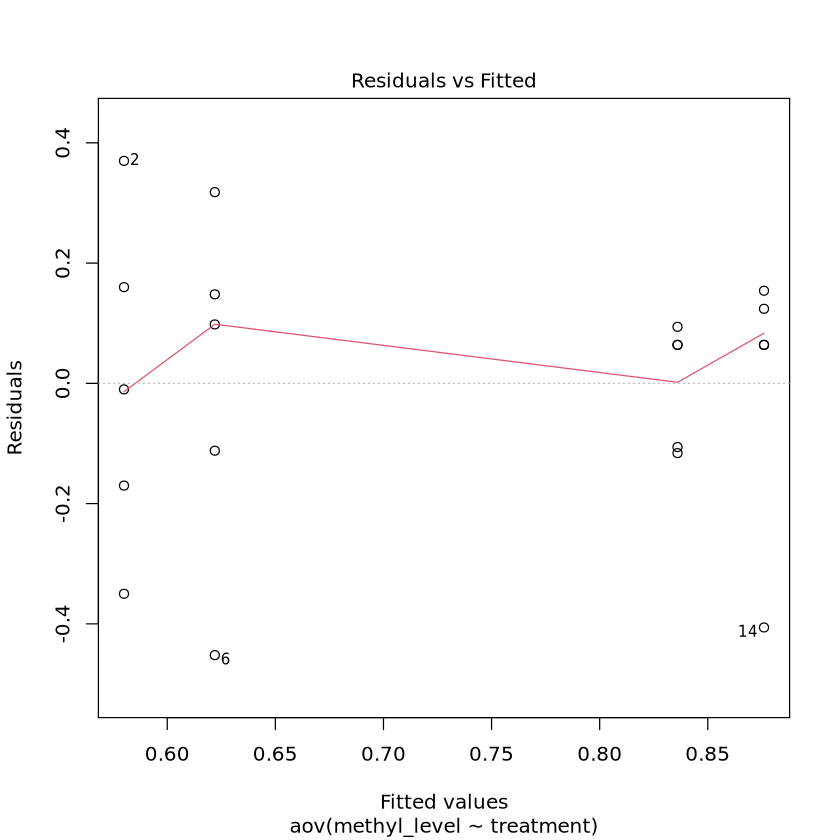

In [136]:
plot(res.aov,1)

In [137]:
leveneTest(methyl_level ~ treatment, data = cpg)

ERROR: Error in leveneTest(methyl_level ~ treatment, data = cpg): could not find function "leveneTest"


from [source](https://www.sthda.com/english/wiki/one-way-anova-test-in-r): "...the p-value is not less than the significance level of 0.05. This means that there is no evidence to suggest that the variance across groups is statistically significantly different. Therefore, we can assume the homogeneity of variances in the different treatment groups."

**check the normality assumption**

In [ ]:
plot(res.aov, 2)

# Extract the residuals
aov_residuals <- residuals(object = res.aov )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

so no statistically significant differences of methlyation levels for CpG dinucleotides between treatments

#### fixing ANOVA
after talking to SGW 12/5 - need to split phase 1 and 2 and look at the interaction of the two - bc some oysters experienced the same treatment in either phase 1 or 2

### two-way ANOVA of CpG methylation

In [162]:
cpg <- cg_meLevel
head(cpg)

,methyl_count,replicate,treatment,methyl_level
,<dbl>,<dbl>,<chr>,<dbl>
1,147798,1,CC,1.022
2,59287,2,CC,0.410
3,137931,3,CC,0.954
4,81789,4,CC,0.566
5,33975,5,CC,0.235
6,140077,1,CH,0.969


In [163]:
# for loop to assign phase 1 and phase 2 treatments based on the treatment column
cpg <- cpg %>%
  mutate(phase1 = ifelse(str_sub(treatment, 1, 1) == "C", "control", "hypoxia"),
         phase2 = ifelse(str_sub(treatment, 2, 2) == "H", "hypoxia", "control"))

cpg

methyl_count,replicate,treatment,methyl_level,phase1,phase2
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
147798,1,CC,1.022,control,control
59287,2,CC,0.410,control,control
137931,3,CC,0.954,control,control
81789,4,CC,0.566,control,control
33975,5,CC,0.235,control,control
140077,1,CH,0.969,control,hypoxia
24101,2,CH,0.167,control,hypoxia
73538,3,CH,0.509,control,hypoxia
136233,4,CH,0.942,control,hypoxia


In [170]:
# running a two-way ANOVA
model <- aov(methyl_level ~ phase1 * phase2, data = cpg)
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)
phase1         1 0.2081 0.20808   2.874  0.109
phase2         1 0.0000 0.00003   0.000  0.983
phase1:phase2  1 0.0035 0.00354   0.049  0.828
Residuals     16 1.1585 0.07241               

#### **Tukey Honestly Significant Difference (HSD)** post hoc test 
compares the means of multiple groups

In [171]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ phase1 * phase2, data = cpg)

$phase1
                 diff         lwr       upr     p adj
hypoxia-control 0.204 -0.05110653 0.4591065 0.1094039

$phase2
                   diff        lwr       upr     p adj
hypoxia-control -0.0026 -0.2577065 0.2525065 0.9830296

$`phase1:phase2`
                                   diff        lwr       upr     p adj
hypoxia:control-control:control  0.2306 -0.2563014 0.7175014 0.5434766
control:hypoxia-control:control  0.0240 -0.4629014 0.5109014 0.9989556
hypoxia:hypoxia-control:control  0.2014 -0.2855014 0.6883014 0.6454466
control:hypoxia-hypoxia:control -0.2066 -0.6935014 0.2803014 0.6272595
hypoxia:hypoxia-hypoxia:control -0.0292 -0.5161014 0.4577014 0.9981269
hypoxia:hypoxia-control:hypoxia  0.1774 -0.3095014 0.6643014 0.7277601


**main effects:**
- phase 1 hypoxia has significantly higher methylation levels than phase 1 control
- no main effect from phase 2

**interaction effects**
- no interaction effects


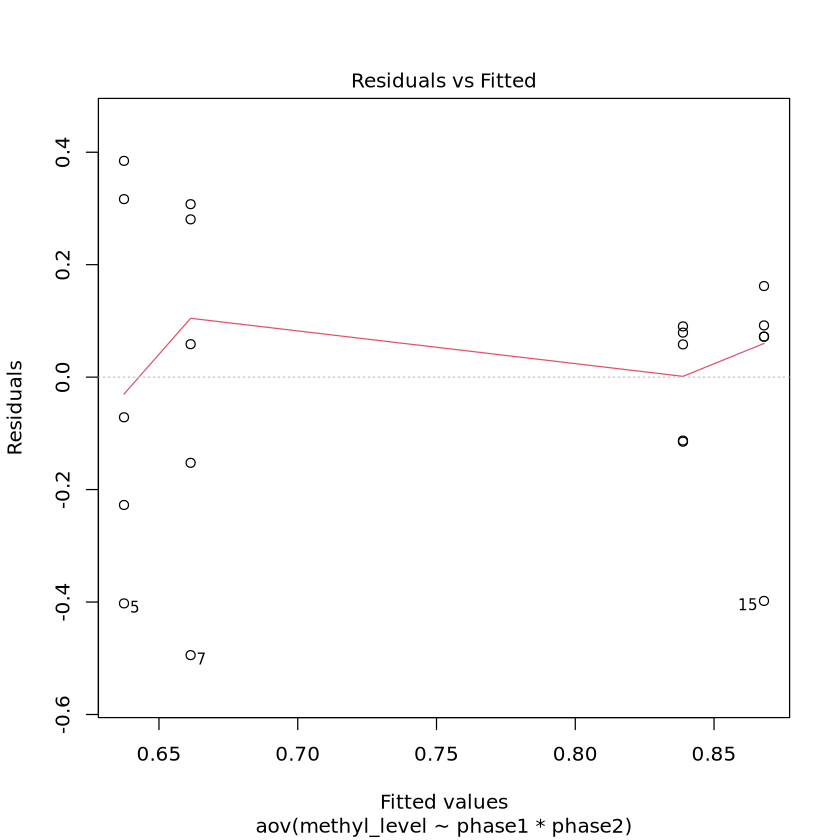

In [172]:
plot(model,1)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.94512, p-value = 0.299


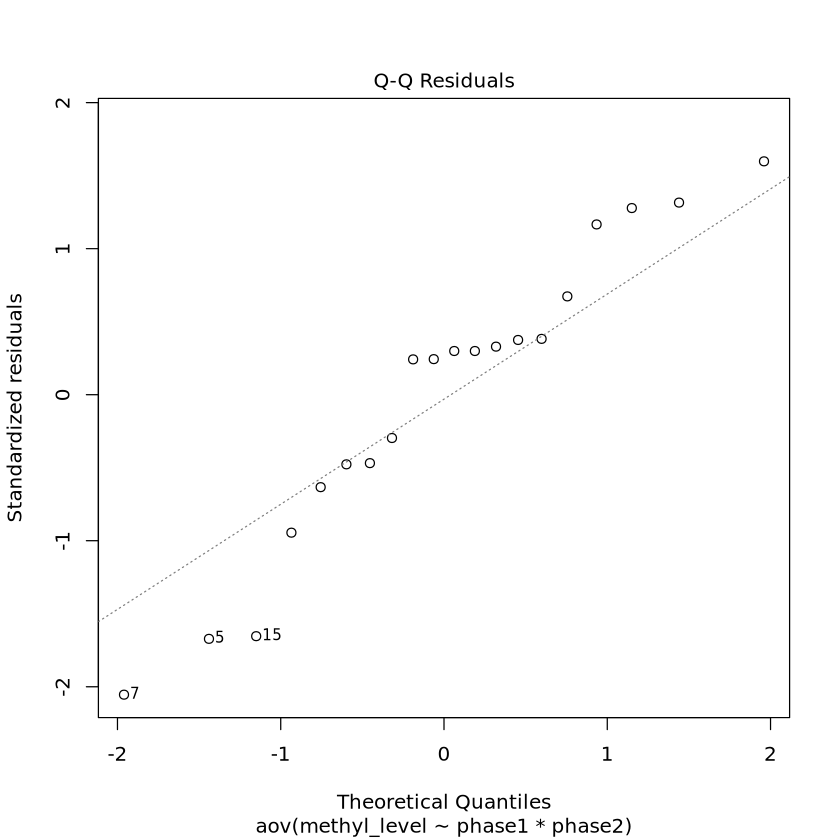

In [173]:
plot(model, 2)

# Extract the residuals
aov_residuals <- residuals(object = model )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

## NMDS plot 
I had originally made an NMDS plot with the DESeq results in [DESeq_geneFeatures.ipynb](https://github.com/jgmcdonough/CE18_methylRAD_analysis/blob/master/analysis/DMGs_analysis/DESeq_geneFeatures.ipynb) - but this was with genes and not CpG dinucleotides. I'm interested in how the plot changes when looking at methylated CpG and exons.

Following pipeline from [here](https://jkzorz.github.io/2019/06/06/NMDS.html)



In [2]:
library(vegan)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



### CpG methylation
I have already loaded in the CSVs above, but now need to format

In [5]:
CG_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CG_motif_multicov.csv', sep='\t')
head(CG_multicov)

,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4,X0.5,⋯,X0.10,X0.11,X0.12,X0.13,X0.14,X0.15,X0.16,X0.17,X0.18,X0.19
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
# extract sample names
bam_files <- dir(path = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/", pattern = "^.*\\.bam$", full.names = FALSE, ignore.case = TRUE, all.files = TRUE)
bam_files

# clean sample names
bam_files_clean <- gsub("^2018--|-CV_sorted\\.bam$", "", bam_files)
bam_files_clean

# add sample names to CG_multicov
colnames(CG_multicov) <- c('chromosome', 'start', 'stop', 'CG_motif', bam_files_clean)
head(CG_multicov)

[1] "2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam"
 [3] "2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam"
 [5] "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam"
 [7] "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam"
 [9] "2018--BBR-BBY-B26-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam"
[11] "2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-BBB-W56-CV_sorted.bam"
[13] "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam"
[15] "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam"
[17] "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam"
[19] "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam"

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
 [6] "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26" "BBY-WBG-B42"
[11] "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03" "WBO-WBV-W64"
[16] "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65" "WBY-BBY-W30"

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,⋯,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


formatting meta df

In [7]:
CC_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv')
CH_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv')
HC_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv')
HH_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv')

In [177]:
# pulling out sample names for downstream use
CC_samples <- colnames(CC_multicov[,5:9])
CC_samples

CH_samples <- colnames(CH_multicov[,5:9])
CH_samples

HC_samples <- colnames(HC_multicov[,5:9])
HC_samples

HH_samples <- colnames(HH_multicov[,5:9])
HH_samples

[1] "WBB-WBV-W69" "WBG-WBG-W44" "WBO-WBV-W64" "WBV-WBO-W23" "WBV-WBR-W12"

[1] "WBG-BBB-W56" "WBO-BBR-W03" "WBR-BBY-W25" "WBY-BBV-W65" "WBY-BBY-W30"

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-WBO-B16" "BBO-WBV-B64" "BBY-WBG-B42"

[1] "BBO-BBO-B16" "BBO-BBY-B27" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26"

In [178]:
# Create sample-treatment metadata table
CC <- data.frame(
    Sample = CC_samples,
    Treatment = 'CC',
    Phase1 = 'control',
    Phase2 = 'control')


HC <- data.frame(
    Sample = HC_samples,
    Treatment = 'HC',
    Phase1 = 'hypoxia',
    Phase2 = 'control')


CH <- data.frame(
    Sample = CH_samples,
    Treatment = 'CH',
    Phase1 = 'control',
    Phase2 = 'hypoxia')


HH <- data.frame(
    Sample = HH_samples,
    Treatment = 'HH',
    Phase1 = 'hypoxia',
    Phase2 = 'hypoxia')


meta <- rbind(CC, CH, HC, HH)

In [179]:
# Replace dots with dashes
sample_ids <- meta$Sample
sample_ids_dashed <- gsub("\\.", "-", sample_ids)

meta$Sample <- sample_ids_dashed
meta

Sample,Treatment,Phase1,Phase2
<chr>,<chr>,<chr>,<chr>
WBB-WBV-W69,CC,control,control
WBG-WBG-W44,CC,control,control
WBO-WBV-W64,CC,control,control
WBV-WBO-W23,CC,control,control
WBV-WBR-W12,CC,control,control
WBG-BBB-W56,CH,control,hypoxia
WBO-BBR-W03,CH,control,hypoxia
WBR-BBY-W25,CH,control,hypoxia
WBY-BBV-W65,CH,control,hypoxia


In [180]:
# df with only counts
counts = CG_multicov[,5:ncol(CG_multicov)]

# turn df into matrix
counts_m = as.matrix(counts)

head(counts_m)

BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
library(vegan)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



In [ ]:
# Create a data frame for plotting
nmds_df <- data.frame(
  NMDS1 = nmds.res$points[, 1],
  NMDS2 = nmds.res$points[, 2],
  Treatment = meta$Treatment,
    Phase1 = meta$Phase1,
    Phase2 = meta$Phase2
)

# Create the NMDS plot using ggplot2
ggplot(nmds_df, aes(x = NMDS1, y = NMDS2, col = Phase1, shape = Phase2)) +
  geom_point() +
  labs(title = "NMDS Plot", x = "NMDS1", y = "NMDS2") +
  theme_classic()

do i need to do DESeq for this????

In [4]:
library(DESeq2)
library(tidyverse)

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                              colData = meta_filtered, 
                              design = ~ Phase2)
dds=DESeq(dds)
resultsNames(dds)

# `bedtools multicov` on Genes

In [1]:
geneMulticov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/geneMulticov.csv', sep = '\t', header = FALSE)
head(geneMulticov)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,13578,14594,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,28961,33324,0,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,43111,66897,0,0,0,0,0,0,2,⋯,0,0,0,0,4,2,0,0,2,0
4,NC_035780.1,85606,95254,8,12,0,0,6,4,0,⋯,2,1,0,0,4,0,6,0,0,10
5,NC_035780.1,99840,106460,14,4,2,0,6,0,0,⋯,6,2,0,0,4,0,2,0,0,2
6,NC_035780.1,108305,110077,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [2]:
# read BAM file names 
bam_files <- dir(path = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/", pattern = "^.*\\.bam$", full.names = FALSE, ignore.case = TRUE, all.files = TRUE)

# clean sample names
bam_files_clean <- gsub("^2018--|-CV_sorted\\.bam$", "", bam_files)
bam_files_clean

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
 [6] "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26" "BBY-WBG-B42"
[11] "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03" "WBO-WBV-W64"
[16] "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65" "WBY-BBY-W30"

In [3]:
colnames(geneMulticov) <- c('chromosome', 'start', 'stop', bam_files_clean)
head(geneMulticov)

,chromosome,start,stop,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,⋯,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,13578,14594,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,28961,33324,0,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,43111,66897,0,0,0,0,0,0,2,⋯,0,0,0,0,4,2,0,0,2,0
4,NC_035780.1,85606,95254,8,12,0,0,6,4,0,⋯,2,1,0,0,4,0,6,0,0,10
5,NC_035780.1,99840,106460,14,4,2,0,6,0,0,⋯,6,2,0,0,4,0,2,0,0,2
6,NC_035780.1,108305,110077,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
# Base columns
base_cols <- geneMulticov[, c("chromosome", "start", "stop")]

########################################################################
## HYPOXIC CONTROL

# Additional columns matching pattern
HC_cols <- geneMulticov[, grepl("BB.-WB.-\\w{3}", names(geneMulticov))]

# Create new data frame
HC_multicov <- cbind(base_cols, HC_cols)

########################################################################
## HYPOXIC HYPOXIC

# Additional columns matching pattern
HH_cols <- geneMulticov[, grepl("BB.-BB.-\\w{3}", names(geneMulticov))]

# Create new data frame
HH_multicov <- cbind(base_cols, HH_cols)

########################################################################
## CONTROL HYPOXIC

# Additional columns matching pattern
CH_cols <- geneMulticov[, grepl("WB.-BB.-\\w{3}", names(geneMulticov))]

# Create new data frame
CH_multicov <- cbind(base_cols, CH_cols)

########################################################################
# CONTROL CONTROL

# Additional columns matching pattern
CC_cols <- geneMulticov[, grepl("WB.-WB.-\\w{3}", names(geneMulticov))]

# Create new data frame
CC_multicov <- cbind(base_cols, CC_cols)

########################################################################
head(HC_multicov)
head(HH_multicov)
head(CH_multicov)
head(CC_multicov)

,chromosome,start,stop,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,13578,14594,0,0,0,0,0
2,NC_035780.1,28961,33324,0,0,0,2,0
3,NC_035780.1,43111,66897,0,0,0,0,0
4,NC_035780.1,85606,95254,8,12,6,4,2
5,NC_035780.1,99840,106460,14,4,6,0,0
6,NC_035780.1,108305,110077,0,0,0,0,0


,chromosome,start,stop,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,13578,14594,0,0,0,0,2
2,NC_035780.1,28961,33324,0,0,0,0,0
3,NC_035780.1,43111,66897,0,0,2,0,0
4,NC_035780.1,85606,95254,0,0,0,0,2
5,NC_035780.1,99840,106460,2,0,0,0,2
6,NC_035780.1,108305,110077,0,0,0,0,0


,chromosome,start,stop,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,13578,14594,0,0,0,0,0
2,NC_035780.1,28961,33324,0,0,0,0,0
3,NC_035780.1,43111,66897,0,0,2,2,0
4,NC_035780.1,85606,95254,1,0,0,0,10
5,NC_035780.1,99840,106460,2,0,0,0,2
6,NC_035780.1,108305,110077,0,0,0,0,0


,chromosome,start,stop,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,13578,14594,0,0,0,0,0
2,NC_035780.1,28961,33324,0,0,0,0,0
3,NC_035780.1,43111,66897,0,0,4,0,0
4,NC_035780.1,85606,95254,2,0,4,6,0
5,NC_035780.1,99840,106460,6,0,4,2,0
6,NC_035780.1,108305,110077,0,0,0,0,0


#### calculating methylation level 
for each individual within a treatment group

**control control**

In [6]:
CCsample_columns <- CC_multicov[, 4:8] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_cc <- colSums(CCsample_columns >= 5)

# Print the result
ML_cc

WBB-WBV-W69 WBG-WBG-W44 WBO-WBV-W64 WBV-WBO-W23 WBV-WBR-W12 
      14127        9378       14142       11122        7322

In [7]:
total_gene <- dim(CC_multicov)[1]
total_gene

[1] 38262

In [8]:
# create dataframe 
CCml_gene <- as.data.frame(ML_cc)


# assign replicate #'s
CCml_gene$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CCml_gene) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CCml_gene) <- NULL

# add treatment
CCml_gene$treatment <- 'CC'

# calculate methylation level
CCml_gene$methyl_level <- round(((CCml_gene$methyl_count/total_gene)*100),3)


CCml_gene

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
14127,1,CC,36.922
9378,2,CC,24.510
14142,3,CC,36.961
11122,4,CC,29.068
7322,5,CC,19.136


**control hypoxic**

In [9]:
CHsample_columns <- CH_multicov[, 4:8] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_ch <- colSums(CHsample_columns >= 5)

# Print the result
ML_ch

WBG-BBB-W56 WBO-BBR-W03 WBR-BBY-W25 WBY-BBV-W65 WBY-BBY-W30 
      13820        5965       10170       13832       12177

In [10]:
# create dataframe 
CHml_gene <- as.data.frame(ML_ch)


# assign replicate #'s
CHml_gene$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CHml_gene) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CHml_gene) <- NULL

# add treatment
CHml_gene$treatment <- 'CH'

# calculate methylation level
CHml_gene$methyl_level <- round(((CHml_gene$methyl_count/total_gene)*100),3)


CHml_gene

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
13820,1,CH,36.119
5965,2,CH,15.590
10170,3,CH,26.580
13832,4,CH,36.151
12177,5,CH,31.825


**hypoxic hypoxic**

In [11]:
HHsample_columns <- HH_multicov[, 4:8] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hh <- colSums(HHsample_columns >= 5)

# Print the result
ML_hh

BBO-BBO-B16 BBO-BBY-B27 BBR-BBB-B50 BBR-BBG-B38 BBR-BBY-B26 
      13655       12228       12415       13794       13621

In [12]:
# create dataframe 
HHml_gene <- as.data.frame(ML_hh)


# assign replicate #'s
HHml_gene$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HHml_gene) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HHml_gene) <- NULL

# add treatment
HHml_gene$treatment <- 'HH'

# calculate methylation level
HHml_gene$methyl_level <- round(((HHml_gene$methyl_count/total_gene)*100),3)


HHml_gene

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
13655,1,HH,35.688
12228,2,HH,31.959
12415,3,HH,32.447
13794,4,HH,36.051
13621,5,HH,35.599


**hypoxic control**

In [13]:
HCsample_columns <- HC_multicov[, 4:8] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hc <- colSums(HCsample_columns >= 5)

# Print the result
ML_hc

BBB-WBO-B21 BBB-WBV-B70 BBO-WBO-B16 BBO-WBV-B64 BBY-WBG-B42 
      13795       13641       14319       13620       10401

In [14]:
# create dataframe 
HCml_gene <- as.data.frame(ML_hc)


# assign replicate #'s
HCml_gene$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HCml_gene) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HCml_gene) <- NULL

# add treatment
HCml_gene$treatment <- 'HC'

# calculate methylation level
HCml_gene$methyl_level <- round(((HCml_gene$methyl_count/total_gene)*100),3)


HCml_gene

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
13795,1,HC,36.054
13641,2,HC,35.652
14319,3,HC,37.424
13620,4,HC,35.597
10401,5,HC,27.184


In [15]:
geneMe <- rbind(CCml_gene, CHml_gene, HCml_gene, HHml_gene)
geneMe

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
14127,1,CC,36.922
9378,2,CC,24.510
14142,3,CC,36.961
11122,4,CC,29.068
7322,5,CC,19.136
13820,1,CH,36.119
5965,2,CH,15.590
10170,3,CH,26.580
13832,4,CH,36.151


In [16]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


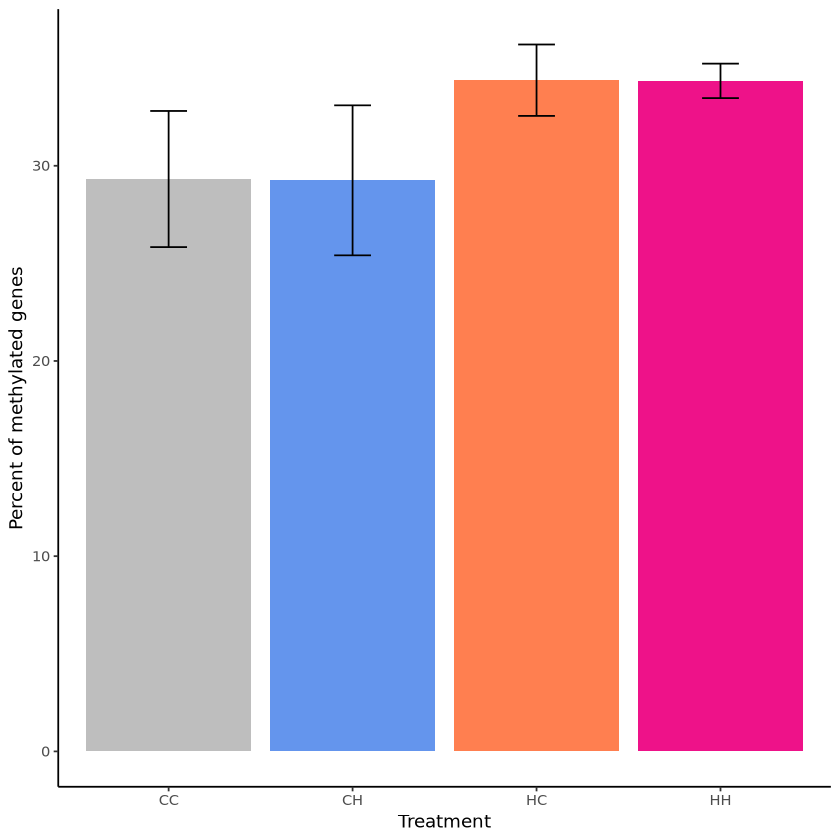

In [17]:
df_summary <- geneMe %>%
  group_by(treatment) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  )

# Create a bar plot with error bars
geneMe_barplot <- ggplot(df_summary, aes(x = treatment, y = mean_methyl_level, fill = treatment)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
#scale_fill_brewer(palette = "RdPu", direction = 1) +
scale_fill_manual(values=c('gray', 'cornflowerblue', 'coral','deeppink2')) +
guides(fill = FALSE) +
  labs(x = "Treatment", y = "Percent of methylated genes") +
  theme_classic()

geneMe_barplot

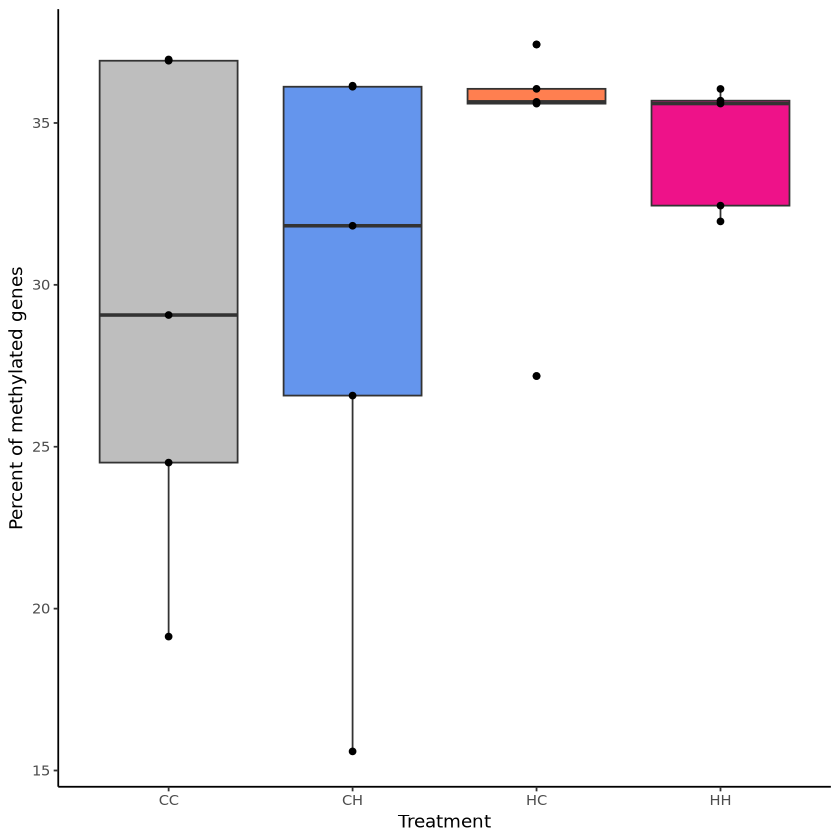

In [18]:
geneMe_boxplot <- ggplot(geneMe, aes(x = treatment, y = methyl_level, fill = treatment)) +
  geom_boxplot() +
geom_point() +
#scale_fill_brewer(palette = "RdPu", direction = 1) +
scale_fill_manual(values=c('gray', 'cornflowerblue', 'coral','deeppink2')) +
guides(fill=FALSE) +
  labs(x = "Treatment", y = "Percent of methylated genes") +
  theme_classic()

geneMe_boxplot

#### two-way ANOVA

In [19]:
# making copy of df
gene <- geneMe
head(gene)

,methyl_count,replicate,treatment,methyl_level
,<dbl>,<dbl>,<chr>,<dbl>
1,14127,1,CC,36.922
2,9378,2,CC,24.510
3,14142,3,CC,36.961
4,11122,4,CC,29.068
5,7322,5,CC,19.136
6,13820,1,CH,36.119


In [20]:
# for loop to assign phase 1 and phase 2 treatments based on the treatment column
gene <- gene %>%
  mutate(phase1 = ifelse(str_sub(treatment, 1, 1) == "C", "control", "hypoxia"),
         phase2 = ifelse(str_sub(treatment, 2, 2) == "H", "hypoxia", "control"))

gene

methyl_count,replicate,treatment,methyl_level,phase1,phase2
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
14127,1,CC,36.922,control,control
9378,2,CC,24.510,control,control
14142,3,CC,36.961,control,control
11122,4,CC,29.068,control,control
7322,5,CC,19.136,control,control
13820,1,CH,36.119,control,hypoxia
5965,2,CH,15.590,control,hypoxia
10170,3,CH,26.580,control,hypoxia
13832,4,CH,36.151,control,hypoxia


In [21]:
# running a two-way ANOVA
model <- aov(methyl_level ~ phase1 * phase2, data = gene)
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)  
phase1         1  129.0  129.00   3.325  0.087 .
phase2         1    0.0    0.01   0.000  0.986  
phase1:phase2  1    0.0    0.00   0.000  0.995  
Residuals     16  620.8   38.80                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### **Tukey Honestly Significant Difference (HSD)** post hoc test 
compares the means of multiple groups

In [22]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ phase1 * phase2, data = gene)

$phase1
                  diff        lwr      upr     p adj
hypoxia-control 5.0793 -0.8259889 10.98459 0.0869818

$phase2
                   diff       lwr      upr     p adj
hypoxia-control -0.0499 -5.955189 5.855389 0.9859295

$`phase1:phase2`
                                   diff        lwr       upr     p adj
hypoxia:control-control:control  5.0628  -6.208151 16.333751 0.5848352
control:hypoxia-control:control -0.0664 -11.337351 11.204551 0.9999982
hypoxia:hypoxia-control:control  5.0294  -6.241551 16.300351 0.5898829
control:hypoxia-hypoxia:control -5.1292 -16.400151  6.141751 0.5748137
hypoxia:hypoxia-hypoxia:control -0.0334 -11.304351 11.237551 0.9999998
hypoxia:hypoxia-control:hypoxia  5.0958  -6.175151 16.366751 0.5798522


#### venn diagram - gene methylation

In [30]:
CCgene <- CC_multicov
CCgene$gene <- paste(CCgene$chromosome, CCgene$start, CCgene$stop, sep='_')

CHgene <- CH_multicov
CHgene$gene <- paste(CHgene$chromosome, CHgene$start, CHgene$stop, sep='_')

HCgene <- HC_multicov
HCgene$gene <- paste(HCgene$chromosome, HCgene$start, HCgene$stop, sep='_')

HHgene <- HH_multicov
HHgene$gene <- paste(HHgene$chromosome, HHgene$start, HHgene$stop, sep='_')


have to choose how to characterize what is a methylated gene in a treatment group (all 5 replicates have to have at least 5 sequences? only 4/5, 3/5?)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


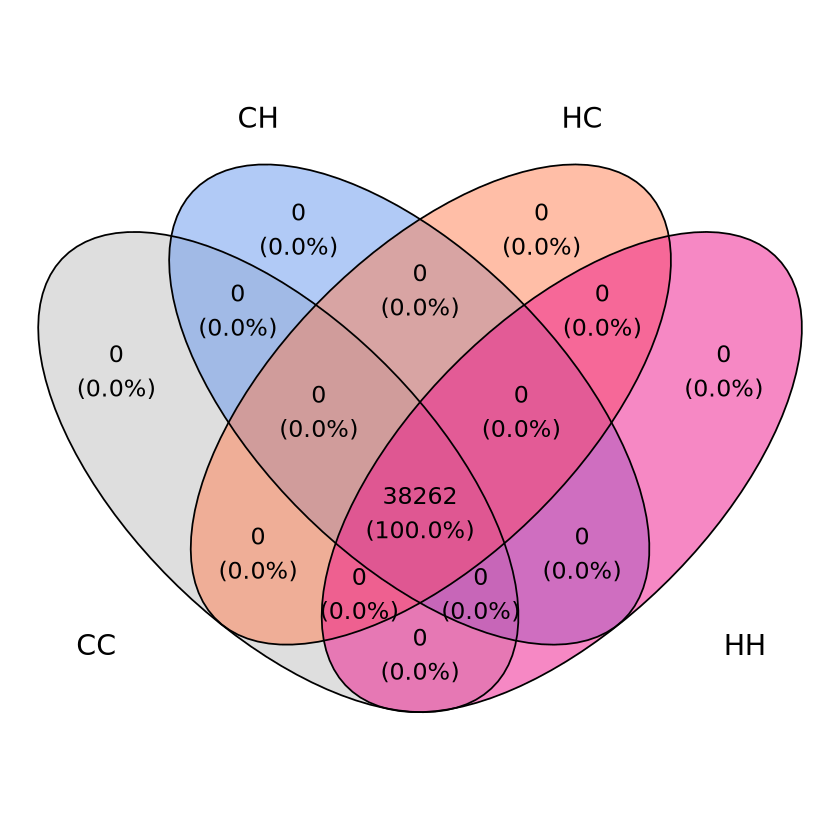

In [33]:
x = list(A = CCgene$gene,
         B = CHgene$gene, 
         C = HCgene$gene,
        D = HHgene$gene)

names(x) <- c('CC', 'CH', 'HC', 'HH')

cpg_venn <- ggvenn(x,
      set_name_size = 6,
       text_size = 5,
      stroke_size = 0.5, 
       show_percentage = TRUE) + 
scale_fill_manual(values=c('gray', 'cornflowerblue', 'coral','deeppink2'))

cpg_venn

### CpG methylation boxplot but faceted by second exposure

In [4]:
cpg <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')
cpg <- cpg[,-1]
cpg

methyl_count,replicate,treatment,methyl_level
<int>,<int>,<chr>,<dbl>
59287,1,CC,0.41
137931,2,CC,0.95
81789,3,CC,0.57
33975,4,CC,0.23
107643,5,CC,0.74
24101,1,CH,0.17
73538,2,CH,0.51
136233,3,CH,0.94
104170,4,CH,0.72


In [5]:
# Assuming your data is in a dataframe called 'df'
cpg$phase1 <- ifelse(substr(cpg$treatment, 1, 1) == "C", "Control", "Hypoxic")
cpg$phase2 <- ifelse(substr(cpg$treatment, 2, 2) == "C", "Control", "Hypoxic")

cpg

methyl_count,replicate,treatment,methyl_level,phase1,phase2
<int>,<int>,<chr>,<dbl>,<chr>,<chr>
59287,1,CC,0.41,Control,Control
137931,2,CC,0.95,Control,Control
81789,3,CC,0.57,Control,Control
33975,4,CC,0.23,Control,Control
107643,5,CC,0.74,Control,Control
24101,1,CH,0.17,Control,Hypoxic
73538,2,CH,0.51,Control,Hypoxic
136233,3,CH,0.94,Control,Hypoxic
104170,4,CH,0.72,Control,Hypoxic


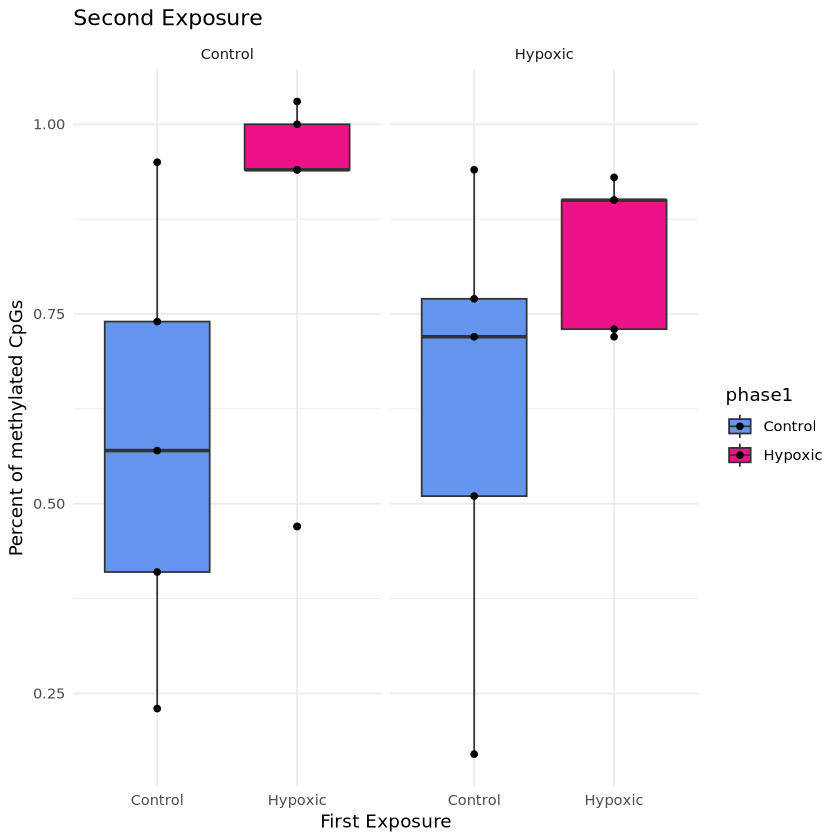

In [22]:
cpgBoxplot <- ggplot(cpg, aes(x = phase1, y = methyl_level, fill = phase1)) +
  geom_boxplot() +
geom_point() +
facet_wrap(~ phase2) +
scale_fill_manual(values=c('cornflowerblue', 'deeppink2')) +
guides(value = FALSE) +
labs(x = "First Exposure", y = "Percent of methylated CpGs", title = "Second Exposure") +
theme(plot.title = element_text(hjust = 0.5, vjust = 1)) + 
theme_minimal()

cpgBoxplot

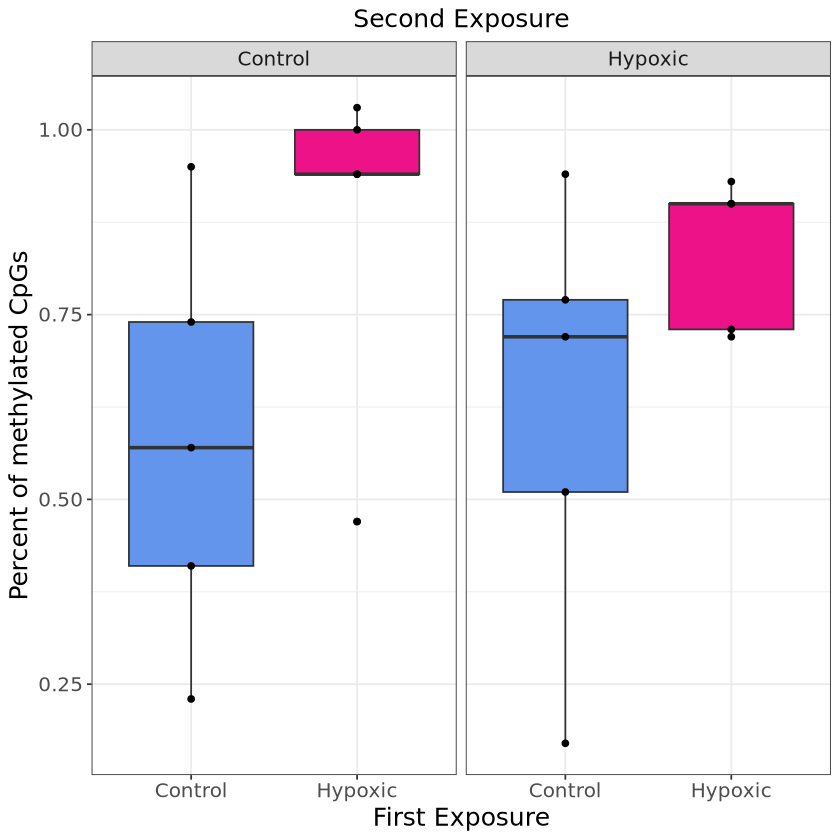

In [36]:
cpgBoxplot <- ggplot(cpg, aes(x = phase1, y = methyl_level, fill = phase1)) +
  geom_boxplot() +
  geom_point() +
  facet_wrap(~ phase2) +
  scale_fill_manual(values=c('cornflowerblue', 'deeppink2')) +
  guides(fill = FALSE) +
  labs(x = "First Exposure", y = "Percent of methylated CpGs", subtitle = "Second Exposure") +
  theme_bw() +
  theme(text = element_text(size = 15), plot.subtitle = element_text(hjust=0.5))

cpgBoxplot

# CpG methylation
investigating using diff. cutoffs for CpG methylation - what qualifies a CpG to be methylated for an individual oyster? what about for the treatment group? 

starting with the individual: 
- originally had the cutoff at 5 sequences to be considered methylated 

what happens if we increase that to 10?

In [2]:
CC_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv')
CH_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv')
HC_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv')
HH_mutlicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv')

### 10 cutoff

### **control control**

In [3]:
CCsample_columns <- CC_multicov[, 6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_cc <- colSums(CCsample_columns >= 10)

# Print the result
ML_cc

WBB.WBV.W69 WBG.WBG.W44 WBO.WBV.W64 WBV.WBO.W23 WBV.WBR.W12 
     109691       36355       98942       53453       16516

In [4]:
# create dataframe 
CCml_cpg <- as.data.frame(ML_cc)


# assign replicate #'s
CCml_cpg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CCml_cpg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CCml_cpg) <- NULL

# add treatment
CCml_cpg$treatment <- 'CC'

CCml_cpg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
109691,1,CC
36355,2,CC
98942,3,CC
53453,4,CC
16516,5,CC


### **control hypoxic**

In [5]:
CHsample_columns <- CH_multicov[,6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_ch <- colSums(CHsample_columns >= 10)

# Print the result
ML_ch

WBG.BBB.W56 WBO.BBR.W03 WBR.BBY.W25 WBY.BBV.W65 WBY.BBY.W30 
     103911       10540       48438       97299       73289

In [6]:
# create dataframe 
CHml_cg <- as.data.frame(ML_ch)

# assign replicate #'s
CHml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CHml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CHml_cg) <- NULL

# add treatment
CHml_cg$treatment <- 'CH'

CHml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
103911,1,CH
10540,2,CH
48438,3,CH
97299,4,CH
73289,5,CH


### **hypoxic hypoxic**

In [7]:
HHsample_columns <- HH_mutlicov[,6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hh <- colSums(HHsample_columns >= 10)

# Print the result
ML_hh

BBO.BBO.B16 BBO.BBY.B27 BBR.BBB.B50 BBR.BBG.B38 BBR.BBY.B26 
      97786       75985       71438       99144       95578

In [8]:
# create dataframe 
HHml_cg <- as.data.frame(ML_hh)

# assign replicate #'s
HHml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HHml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HHml_cg) <- NULL

# add treatment
HHml_cg$treatment <- 'HH'

HHml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
97786,1,HH
75985,2,HH
71438,3,HH
99144,4,HH
95578,5,HH


### **hypoxic control**

In [9]:
HCsample_columns <- HC_multicov[, 6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hc <- colSums(HCsample_columns >= 10)

# Print the result
ML_hc

BBB.WBO.B21 BBB.WBV.B70 BBO.WBO.B16 BBO.WBV.B64 BBY.WBG.B42 
     106502      103732      113732      103271       42650

In [10]:
# create dataframe 
HCml_cg <- as.data.frame(ML_hc)

# assign replicate #'s
HCml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HCml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HCml_cg) <- NULL

# add treatment
HCml_cg$treatment <- 'HC'

HCml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
106502,1,HC
103732,2,HC
113732,3,HC
103271,4,HC
42650,5,HC


In [11]:
cg_meLevel <- rbind(CCml_cpg, CHml_cg, HCml_cg, HHml_cg)
cg_meLevel

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
109691,1,CC
36355,2,CC
98942,3,CC
53453,4,CC
16516,5,CC
103911,1,CH
10540,2,CH
48438,3,CH
97299,4,CH


In [12]:
# calculating total number of CpG dinucleotides in the genome
total_cg <- dim(CC_multicov)[1]
total_cg

# calculating % methylation for CpG dinucleotides in each replicate
cg_meLevel$methyl_level <- round(((cg_meLevel$methyl_count/total_cg)*100),2)

cg_meLevel


[1] 14458702

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
109691,1,CC,0.76
36355,2,CC,0.25
98942,3,CC,0.68
53453,4,CC,0.37
16516,5,CC,0.11
103911,1,CH,0.72
10540,2,CH,0.07
48438,3,CH,0.34
97299,4,CH,0.67


In [13]:
# adding phase 1 and phase 2 info
# Assuming your data is in a dataframe called 'df'
cg_meLevel$phase1 <- ifelse(substr(cg_meLevel$treatment, 1, 1) == "C", "Control", "Hypoxic")
cg_meLevel$phase2 <- ifelse(substr(cg_meLevel$treatment, 2, 2) == "C", "Control", "Hypoxic")

cg_meLevel

methyl_count,replicate,treatment,methyl_level,phase1,phase2
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
109691,1,CC,0.76,Control,Control
36355,2,CC,0.25,Control,Control
98942,3,CC,0.68,Control,Control
53453,4,CC,0.37,Control,Control
16516,5,CC,0.11,Control,Control
103911,1,CH,0.72,Control,Hypoxic
10540,2,CH,0.07,Control,Hypoxic
48438,3,CH,0.34,Control,Hypoxic
97299,4,CH,0.67,Control,Hypoxic


In [14]:
write.csv(cg_meLevel, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/10cutoff_CpG_meLevel.csv', row.names = FALSE)

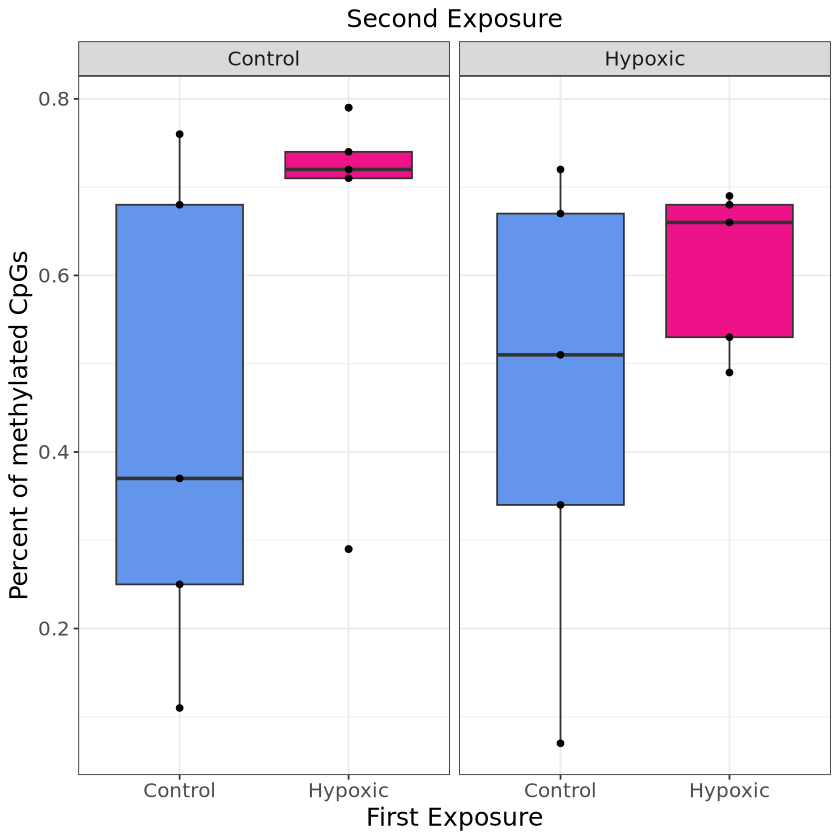

In [18]:
cpgBoxplot <- ggplot(cg_meLevel, aes(x = phase1, y = methyl_level, fill = phase1)) +
  geom_boxplot() +
  geom_point() +
  facet_wrap(~ phase2) +
  scale_fill_manual(values=c('cornflowerblue', 'deeppink2')) +
  guides(fill = 'none') +
  labs(x = "First Exposure", y = "Percent of methylated CpGs", subtitle = "Second Exposure") +
  theme_bw() +
  theme(text = element_text(size = 15), plot.subtitle = element_text(hjust=0.5))

cpgBoxplot

In [19]:
# running a two-way ANOVA
model <- aov(methyl_level ~ phase1 * phase2, data = cg_meLevel)
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)  
phase1         1 0.1656 0.16562   3.351 0.0859 .
phase2         1 0.0002 0.00018   0.004 0.9526  
phase1:phase2  1 0.0058 0.00578   0.117 0.7368  
Residuals     16 0.7908 0.04943                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### **Tukey Honestly Significant Difference (HSD)** post hoc test 
compares the means of multiple groups

In [20]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ phase1 * phase2, data = cg_meLevel)

$phase1
                 diff         lwr       upr     p adj
Hypoxic-Control 0.182 -0.02876805 0.3927681 0.0858569

$phase2
                  diff        lwr       upr     p adj
Hypoxic-Control -0.006 -0.2167681 0.2047681 0.9526258

$`phase1:phase2`
                                  diff        lwr       upr     p adj
Hypoxic:Control-Control:Control  0.216 -0.1862761 0.6182761 0.4403338
Control:Hypoxic-Control:Control  0.028 -0.3742761 0.4302761 0.9970848
Hypoxic:Hypoxic-Control:Control  0.176 -0.2262761 0.5782761 0.6047471
Control:Hypoxic-Hypoxic:Control -0.188 -0.5902761 0.2142761 0.5540399
Hypoxic:Hypoxic-Hypoxic:Control -0.040 -0.4422761 0.3622761 0.9916542
Hypoxic:Hypoxic-Control:Hypoxic  0.148 -0.2542761 0.5502761 0.7219556


### **15 cutoff**

In [3]:
CCsample_columns <- CC_multicov[, 6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_cc <- colSums(CCsample_columns >= 15)

# Print the result
ML_cc

WBB.WBV.W69 WBG.WBG.W44 WBO.WBV.W64 WBV.WBO.W23 WBV.WBR.W12 
      82282       20973       72477       34276        6917

In [4]:
# create dataframe 
CCml_cpg <- as.data.frame(ML_cc)


# assign replicate #'s
CCml_cpg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CCml_cpg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CCml_cpg) <- NULL

# add treatment
CCml_cpg$treatment <- 'CC'

CCml_cpg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
82282,1,CC
20973,2,CC
72477,3,CC
34276,4,CC
6917,5,CC


### **control hypoxic**

In [5]:
CHsample_columns <- CH_multicov[,6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_ch <- colSums(CHsample_columns >= 15)

# Print the result
ML_ch

WBG.BBB.W56 WBO.BBR.W03 WBR.BBY.W25 WBY.BBV.W65 WBY.BBY.W30 
      79053        4440       31797       71216       52104

In [6]:
# create dataframe 
CHml_cg <- as.data.frame(ML_ch)

# assign replicate #'s
CHml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CHml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CHml_cg) <- NULL

# add treatment
CHml_cg$treatment <- 'CH'

CHml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
79053,1,CH
4440,2,CH
31797,3,CH
71216,4,CH
52104,5,CH


### **hypoxic hypoxic**

In [7]:
HHsample_columns <- HH_mutlicov[,6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hh <- colSums(HHsample_columns >= 15)

# Print the result
ML_hh

BBO.BBO.B16 BBO.BBY.B27 BBR.BBB.B50 BBR.BBG.B38 BBR.BBY.B26 
      73377       55871       48724       74538       71628

In [8]:
# create dataframe 
HHml_cg <- as.data.frame(ML_hh)

# assign replicate #'s
HHml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HHml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HHml_cg) <- NULL

# add treatment
HHml_cg$treatment <- 'HH'

HHml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
73377,1,HH
55871,2,HH
48724,3,HH
74538,4,HH
71628,5,HH


### **hypoxic control**

In [9]:
HCsample_columns <- HC_multicov[, 6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hc <- colSums(HCsample_columns >= 15)

# Print the result
ML_hc

BBB.WBO.B21 BBB.WBV.B70 BBO.WBO.B16 BBO.WBV.B64 BBY.WBG.B42 
      83888       79851       88013       79645       26337

In [10]:
# create dataframe 
HCml_cg <- as.data.frame(ML_hc)

# assign replicate #'s
HCml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HCml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HCml_cg) <- NULL

# add treatment
HCml_cg$treatment <- 'HC'

HCml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
83888,1,HC
79851,2,HC
88013,3,HC
79645,4,HC
26337,5,HC


In [11]:
cg_meLevel <- rbind(CCml_cpg, CHml_cg, HCml_cg, HHml_cg)
cg_meLevel

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
82282,1,CC
20973,2,CC
72477,3,CC
34276,4,CC
6917,5,CC
79053,1,CH
4440,2,CH
31797,3,CH
71216,4,CH


In [12]:
# calculating total number of CpG dinucleotides in the genome
total_cg <- dim(CC_multicov)[1]
total_cg

# calculating % methylation for CpG dinucleotides in each replicate
cg_meLevel$methyl_level <- round(((cg_meLevel$methyl_count/total_cg)*100),2)

cg_meLevel


[1] 14458702

methyl_count,replicate,treatment,methyl_level
<dbl>,<dbl>,<chr>,<dbl>
82282,1,CC,0.57
20973,2,CC,0.15
72477,3,CC,0.50
34276,4,CC,0.24
6917,5,CC,0.05
79053,1,CH,0.55
4440,2,CH,0.03
31797,3,CH,0.22
71216,4,CH,0.49


In [13]:
# adding phase 1 and phase 2 info
# Assuming your data is in a dataframe called 'df'
cg_meLevel$phase1 <- ifelse(substr(cg_meLevel$treatment, 1, 1) == "C", "Control", "Hypoxic")
cg_meLevel$phase2 <- ifelse(substr(cg_meLevel$treatment, 2, 2) == "C", "Control", "Hypoxic")

cg_meLevel

methyl_count,replicate,treatment,methyl_level,phase1,phase2
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
82282,1,CC,0.57,Control,Control
20973,2,CC,0.15,Control,Control
72477,3,CC,0.50,Control,Control
34276,4,CC,0.24,Control,Control
6917,5,CC,0.05,Control,Control
79053,1,CH,0.55,Control,Hypoxic
4440,2,CH,0.03,Control,Hypoxic
31797,3,CH,0.22,Control,Hypoxic
71216,4,CH,0.49,Control,Hypoxic


In [14]:
write.csv(cg_meLevel, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/15cutoff_CpG_meLevel.csv', row.names = FALSE)

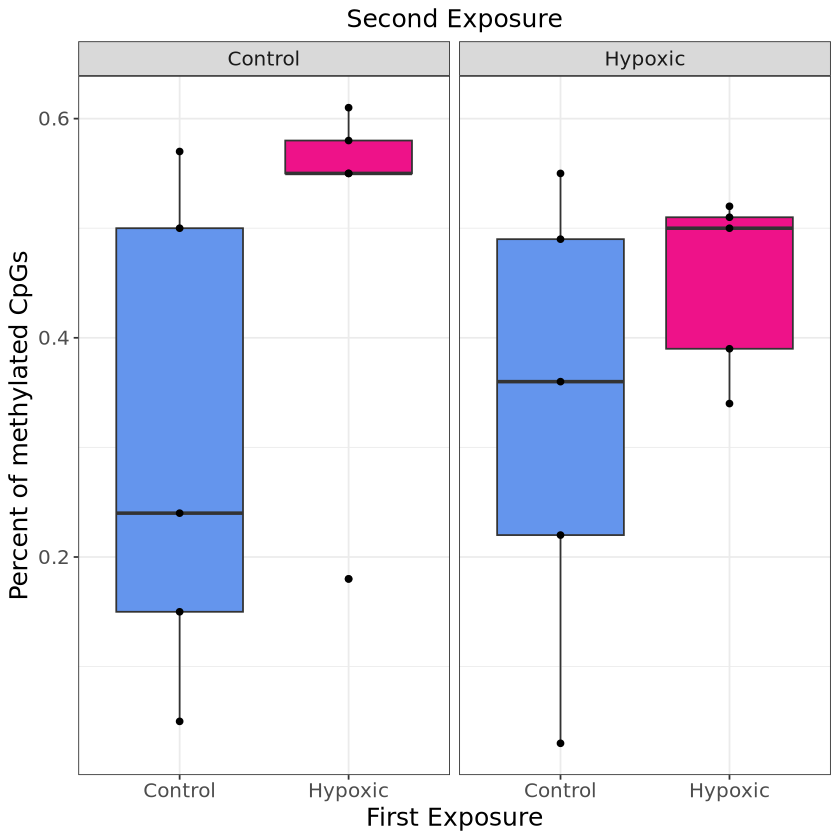

In [17]:
cpgBoxplot <- ggplot(cg_meLevel, aes(x = phase1, y = methyl_level, fill = phase1)) +
  geom_boxplot() +
  geom_point() +
  facet_wrap(~ phase2) +
  scale_fill_manual(values=c('cornflowerblue', 'deeppink2')) +
  guides(fill = 'none') +
  labs(x = "First Exposure", y = "Percent of methylated CpGs", subtitle = "Second Exposure") +
  theme_bw() +
  theme(text = element_text(size = 15), plot.subtitle = element_text(hjust=0.5))

cpgBoxplot

In [18]:
# running a two-way ANOVA
model <- aov(methyl_level ~ phase1 * phase2, data = cg_meLevel)
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)  
phase1         1 0.1232 0.12324   3.714 0.0719 .
phase2         1 0.0002 0.00024   0.007 0.9326  
phase1:phase2  1 0.0061 0.00612   0.185 0.6732  
Residuals     16 0.5309 0.03318                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### **Tukey Honestly Significant Difference (HSD)** post hoc test 
compares the means of multiple groups

In [19]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ phase1 * phase2, data = cg_meLevel)

$phase1
                 diff         lwr      upr    p adj
Hypoxic-Control 0.157 -0.01569097 0.329691 0.071891

$phase2
                  diff       lwr      upr     p adj
Hypoxic-Control -0.007 -0.179691 0.165691 0.9325882

$`phase1:phase2`
                                  diff        lwr       upr     p adj
Hypoxic:Control-Control:Control  0.192 -0.1376014 0.5216014 0.3721323
Control:Hypoxic-Control:Control  0.028 -0.3016014 0.3576014 0.9947453
Hypoxic:Hypoxic-Control:Control  0.150 -0.1796014 0.4796014 0.5747903
Control:Hypoxic-Hypoxic:Control -0.164 -0.4936014 0.1656014 0.5035646
Hypoxic:Hypoxic-Hypoxic:Control -0.042 -0.3716014 0.2876014 0.9828308
Hypoxic:Hypoxic-Control:Hypoxic  0.122 -0.2076014 0.4516014 0.7182944
